<div style="background-color:rgb(230, 223, 200); color:rgb(94, 78, 27); padding: 10px; border-radius: 5px;">
    <p><strong>Analisis Hubungan antara Karakteristik Demografi dan Pola Perilaku Belanja Konsumen di Supermarket
</strong></p>
</div>

>`AIMAR MOHAMMAD BUTRAGUENO` - `JCDS 2804`

# **1. Introduction**

## **Latar Belakang**
> Memahami perilaku konsumen sangat penting dalam dunia ritel saat ini, sehingga organisasi dapat menyesuaikan penawaran dan kampanye pemasaran mereka dengan lebih efektif. Dataset ini memberikan gambaran menyeluruh mengenai atribut pelanggan supermarket, kebiasaan belanja, dan partisipasi dalam kampanye promosi. Setiap titik data dalam dataset ini mewakili interaksi individu pelanggan dengan supermarket, mencakup berbagai aspek seperti data demografis, pola belanja, respons terhadap promosi, dan lainnya. Dataset ini dikumpulkan pada akhir tahun 2014 dan mencatat pembelian pelanggan dalam dua tahun terakhir. Dengan lebih dari 2.000 item, dataset ini menjadi sumber informasi yang berharga untuk menganalisis dinamika hubungan pelanggan dalam lingkungan supermarket.

## **Pernyataan Masalah**
> Dengan menganalisis perilaku pelanggan di Supermarket, Strategi Pemasaran akan dirumuskan untuk membantu bisnis Supermarket menyesuaikan produknya berdasarkan pelanggan yang dituju dari berbagai jenis pelanggan. Tujuan utama dari proyek untuk merumuskan strategi pasar dengan menganalisis Perilaku Belanja Pelanggan. Proyek ini bertujuan untuk menemukan wawasan yang dapat ditindaklanjuti dengan menggali informasi dan memanfaatkan alat analisis data lanjutan, yang kemudian akan disampaikan kepada pemangku kepentingan supermarket. Misalnya, alih-alih menghabiskan uang untuk memasarkan produk baru kepada setiap pelanggan dalam basis data bisnis, supermarket dapat menentukan segmen pelanggan mana yang paling mungkin membeli produk tersebut dan kemudian memasarkan produk tersebut hanya kepada kelompok pelanggan tertentu.

## **Stakeholder**

> Store Manager and Marketing & Sales Teams

## **Data Dictionary**

**PEOPLE**
<br>

| Column | Description
| -- | --- 
| ID | Customer's unique identifier
| Year_Birth | Customer's birth year
| Education | Customer's education level
| Marital_Status | Customer's marital status
| Income | Customer's yearly household income
| Kidhome | Number of children in customer's household
| Teenhome | Number of teenagers in customer's household
| Dt_Customer | Date of customer's enrollment with the company
| Recency | Number of days since customer's last purchase
| Complain | 1 if the customer complained in the last 2 years, 0 otherwise

<br>

**PRODUCT PURCHASE BEHAVIOR**
<br>

| Column | Description
| --- | --- 
| MntWines | Amount spent on wine in last 2 years
| MntFruits | Amount spent on fruits in last 2 years
| MntMeatProducts | Amount spent on meat in last 2 years
| MntFishProducts | Amount spent on fish in last 2 years
| MntSweetProducts | Amount spent on sweets in last 2 years
| MntGoldProds | Amount spent on gold in last 2 years

<br>

**PROMOTIONAL ENGAGEMENT**
<br>

| Column | Description
| --- | --- 
| NumDealsPurchases | Number of purchases made with a discount
| AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise
| AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
| AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
| AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise
| AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise
| Response | 1 if customer accepted the offer in the last campaign, 0 otherwise

<br>

**PURCHASE PLACES**
<br>

| Feature | Description
| --- | --- 
| NumWebPurchases | Number of purchases made through the company’s website
| NumCatalogPurchases | Number of purchases made using a catalogue
| NumStorePurchases | Number of purchases made directly in stores
| NumWebVisitsMonth | Number of visits to company’s website in the last month

# **2. Data Wrangling**

**`Import Library`**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


**`Show Raw Data`**

In [2]:
df_raw = pd.read_excel('supermarket_customers.xlsx')
display(df_raw.head(), df_raw.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
# Membuat duplikasi data
sc = df_raw.copy()
sc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


**`Data Structure`**

In [4]:
# Menampilkan dimensi data
print(f"Dimensi data: {sc.shape}")

Dimensi data: (2240, 29)


In [5]:
# Menampilkan nama-nama kolom pada data
sc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Mengecek ringkasan statistik
sc.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [7]:
sc.describe(include='object')

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [8]:
pd.set_option('display.max_colwidth', 1)

# Unique values in each column
list_item = []
for col in sc.columns :
    list_item.append( [col, sc[col].nunique(), sc[col].unique()])

tabel_desc = pd.DataFrame(columns=[['Column Name', 'Number of Unique', 'Unique Sample']],
                     data=list_item)
tabel_desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 2013-08-21 00:00:00, 2014-02-10 00:00:00, 2014-01-19 00:00:00, 2013-09-09 00:00:00, 2012-11-13 00:00:00, 2013-05-08 00:00:00, 2013-06-06 00:00:00, 2014-03-13 00:00:00, 2013-11-15 00:00:00, 2012-10-10 00:00:00, 2012-11-24 00:00:00, 2012-12-24 00:00:00, 2012-08-31 00:00:00, 2013-03-28 00:00:00, 2012-11-03 00:00:00, 2012-08-08 00:00:00, 2013-01-06 00:00:00, 2012-12-23 00:00:00, 2014-01-11 00:00:00, 2013-03-18 00:00:00, 2013-01-02 00:00:00, 2013-05-27 00:00:00, 2013-02-20 00:00:00, 2013-05-31 00:00:00, 2013-11-22 00:00:00, 2014-05-22 00:00:00, 2013-05-11 00:00:00, 2012-10-29 00:00:00, 2013-08-29 00:00:00, 2013-12-31 00:00:00, 2013-09-02 00:00:00, 2014-02-11 00:00:00, 2013-02-01 00:00:00, 2013-04-29 00:00:00, 2013-03-12 00:00:00, 2013-11-05 00:00:00, 2013-10-02 00:00:00, 2014-06-28 00:00:00, 2012-11-09 00:00:00, 2013-05-24 00:00:00, 2014-01-01 00:00:00, 2012-11-08 00:00:00, 2014-05-12 00:00:00, 2012-08-11 00:00:00, 2014-06-07 00:00:00, 2013-06-12 00:00:00, 2012-11-19 00:00:00, 2013-04-02 00:00:00, 2014-04-28 00:00:00, 2013-06-17 00:00:00, 2014-03-03 00:00:00, 2013-07-04 00:00:00, 2012-09-07 00:00:00, 2013-02-18 00:00:00, 2013-06-11 00:00:00, 2013-12-06 00:00:00, 2013-05-21 00:00:00, 2014-05-11 00:00:00, 2014-03-19 00:00:00, 2013-09-27 00:00:00, 2013-04-08 00:00:00, 2012-09-11 00:00:00, 2012-09-14 00:00:00, 2013-03-17 00:00:00, 2013-04-05 00:00:00, 2014-04-30 00:00:00, 2012-12-19 00:00:00, 2012-08-27 00:00:00, 2012-10-12 00:00:00, 2013-09-04 00:00:00, 2012-08-29 00:00:00, 2013-06-23 00:00:00, 2013-07-03 00:00:00, 2014-02-25 00:00:00, 2013-08-11 00:00:00, 2013-07-16 00:00:00, 2014-05-28 00:00:00, 2014-01-21 00:00:00, 2014-05-27 00:00:00, 2013-11-23 00:00:00, 2014-03-23 00:00:00, 2014-05-24 00:00:00, 2012-11-22 00:00:00, 2013-04-11 00:00:00, 2013-12-01 00:00:00, 2013-06

**`Data Type`**

In [9]:
# Menampilkan informasi dataset
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
# Konversi 'Dt_Customer' ke format datetime
sc['Dt_Customer'] = pd.to_datetime(sc['Dt_Customer'], format='%y-%m-%d')

**`Duplicated Data`**

In [11]:
# Mengecek data duplikat
sc.duplicated().sum()

np.int64(0)

In [12]:
# Mengecek data duplikat
sc[sc.duplicated()].shape

(0, 29)

**`Missing Values`**

In [13]:
# Mengecek missing values
print(f'Dataset sc memiliki missing values sebagai berikut:')
sc.isnull().sum()

Dataset sc memiliki missing values sebagai berikut:


ID                     0 
Year_Birth             0 
Education              0 
Marital_Status         0 
Income                 24
Kidhome                0 
Teenhome               0 
Dt_Customer            0 
Recency                0 
MntWines               0 
MntFruits              0 
MntMeatProducts        0 
MntFishProducts        0 
MntSweetProducts       0 
MntGoldProds           0 
NumDealsPurchases      0 
NumWebPurchases        0 
NumCatalogPurchases    0 
NumStorePurchases      0 
NumWebVisitsMonth      0 
AcceptedCmp3           0 
AcceptedCmp4           0 
AcceptedCmp5           0 
AcceptedCmp1           0 
AcceptedCmp2           0 
Complain               0 
Z_CostContact          0 
Z_Revenue              0 
Response               0 
dtype: int64

In [14]:
# Menghitung jumlah missing values pada setiap kolom dan persentasenya
missing_values = sc.isnull().sum()
missing_percent = (missing_values / len(sc)) * 100

# Menggabungkan jumlah dan persentase missing values dalam satu dataframe
missing_sc = pd.DataFrame({'Jumlah Missing': missing_values, 'Persentase Missing (%)': missing_percent})

# Menampilkan hanya kolom yang memiliki missing values
missing_sc[missing_sc['Jumlah Missing'] > 0]

,Jumlah Missing,Persentase Missing (%)
Income,24,1.071429


**`Data Preparation`**

In [ ]:
# Rename columns
sc = sc.rename(columns = {
    'Dt_Customer'           : 'Date_Customer',
    'MntWines'              : 'Wine_Product',
    'MntFruits'             : 'Fruit_Product',
    'MntMeatProducts'       : 'Meat_Product',
    'MntFishProducts'       : 'Fish_Product',
    'MntSweetProducts'      : 'Sweet_Product',
    'MntGoldProds'          : 'Gold_Product',
    'NumDealsPurchases'     : 'Discount_Purchase',
    'NumWebPurchases'       : 'Web_Purchase',
    'NumCatalogPurchases'   : 'Catalog_Purchase',
    'NumStorePurchases'     : 'Store_Purchase',
    'NumWebVisitsMonth'     : 'Web_Visit_Month'
})

**`New Column Age`**

In [17]:
sc['Date_Customer'].sort_values(ascending=False).head(5)

200    2014-06-29
989    2014-06-29
1812   2014-06-28
796    2014-06-28
45     2014-06-28
Name: Date_Customer, dtype: datetime64[ns]

In [18]:
year = 2015
sc['Age'] = year - sc['Year_Birth']
sc

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Date_Customer,Recency,Wine_Product,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,48
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,69
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,34
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,59


**`Grouping Age Column`**

![alt text](https://mccrindle.com.au/app/uploads/2024/12/7-generations.webp)

In [19]:
def age_categorize(birth):
    if birth >= 1995:
        return 'Gen Z < 20'
    elif birth >= 1980:
        return 'Millenials 21-35'
    elif birth >= 1965:
        return 'Gen X 36-50'
    elif birth >= 1946:
        return 'Boomers 51-69'
    else:
        return 'Builders > 70'

sc['Age_Group'] = sc['Year_Birth'].apply(age_categorize)

**`Grouping Education Column`**

In [20]:
sc['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [21]:
sc['Education'] = sc['Education'].replace({'Basic': 'School',
                                           'Graduation': 'Undergraduate',
                                           'Master': 'Postgraduate',
                                           'PhD': 'Postgraduate',
                                           '2n Cycle': 'Postgraduate',})

**`Grouping Marital Status Column`**

In [22]:
sc['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
sc['Marital_Status'] = sc['Marital_Status'].replace({'Single': 'Alone',
                                                   'Divorced': 'Alone',
                                                   'Widow'   : 'Alone',
                                                   'Absurd'  : 'Alone',
                                                   'YOLO'    : 'Alone',
                                                   'Together': 'Couple',
                                                   'Married' : 'Couple',})

**`New Column Children, Parent, and Family`**

In [24]:
sc['Total_Children'] = sc['Kidhome'] + sc['Teenhome']
sc['is_Parent'] = np.where(sc['Total_Children'] > 0, 'Parent', 'Not Parent')
sc['Family_Count'] = (sc['Marital_Status'].replace({'Alone': 1, 'Couple': 2}) + sc['Total_Children'])

C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\278397445.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sc['Family_Count'] = (sc['Marital_Status'].replace({'Alone': 1, 'Couple': 2}) + sc['Total_Children'])


**`New Column Total Pengeluaran & Total Pembelian`**

In [25]:
sc['Total_Pengeluaran'] = sc['Wine_Product'] + sc['Fruit_Product'] + sc['Meat_Product'] + sc['Fish_Product'] + sc['Sweet_Product'] + sc['Gold_Product']

In [26]:
sc['Total_Pembelian'] = sc['Web_Purchase'] + sc['Catalog_Purchase'] + sc['Store_Purchase']

**`New Column Total Penerimaan Campaign`**

In [27]:
sc['Penerimaan_Campaign'] = sc['AcceptedCmp1'] + sc['AcceptedCmp2'] + sc['AcceptedCmp3'] + sc['AcceptedCmp4'] + sc['AcceptedCmp5'] + sc['Response']

**`Solving Missing Value in Income`**

In [28]:
correlation_matrix = sc[["Income"] + ['Total_Pengeluaran']].corr()
income_corr = correlation_matrix["Income"].sort_values(ascending=False)
income_corr


Income               1.000000
Total_Pengeluaran    0.667576
Name: Income, dtype: float64

In [29]:
# Memeriksa kembali missing values
missVal_before = sc["Income"].isna().sum()
missVal_before

np.int64(24)

In [30]:
from sklearn.linear_model import LinearRegression

# Memisahkan data dengan nilai Income yang tersedia dan yang hilang
sc_missVal_income = sc[sc["Income"].isna()]
sc_available_income = sc.dropna(subset=["Income"])

# Fitur (X) dan target (y) untuk model regresi
sumbu_x = sc_available_income[['Total_Pengeluaran']]
sumbu_y = sc_available_income["Income"]

# Melatih model regresi linear
model = LinearRegression()
model.fit(sumbu_x, sumbu_y)

# Memprediksi nilai Income yang hilang
missing_x = sc_missVal_income[['Total_Pengeluaran']]
predict_income = model.predict(missing_x)

# Mengisi nilai yang hilang dengan prediksi
sc.loc[sc["Income"].isna(), "Income"] = predict_income

# Verifikasi apakah masih ada nilai yang hilang
missVal_after = sc["Income"].isna().sum()

missVal_after

np.int64(0)

**`New Column Income Categories`**

In [31]:
# Menentukan income range dan group
income_range = [0, 30000, 60000, 90000, float('inf')]
income_group = ['Low', 'Medium', 'High', 'Very High']

# Menammbah kolom baru 'Income_Categories'
sc['Income_Categories'] = pd.cut(sc['Income'], bins=income_range, labels=income_group, right=False)
sc['Income_Categories'].value_counts()

Income_Categories
Medium       1023
High         793 
Low          370 
Very High    54  
Name: count, dtype: int64

**`Drop Column`**

In [32]:
sc.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Date_Customer', 'Recency', 'Wine_Product', 'Fruit_Product',
       'Meat_Product', 'Fish_Product', 'Sweet_Product', 'Gold_Product',
       'Discount_Purchase', 'Web_Purchase', 'Catalog_Purchase',
       'Store_Purchase', 'Web_Visit_Month', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Age_Group',
       'Total_Children', 'is_Parent', 'Family_Count', 'Total_Pengeluaran',
       'Total_Pembelian', 'Penerimaan_Campaign', 'Income_Categories'],
      dtype='object')

In [ ]:
# Menghapus kolom yang tidak diperlukan dan buat variabel baru
sc_analysis = sc.drop(columns=['ID',
                        'Date_Customer',
                        'Complain', 
                        'Recency',
                        'Year_Birth',
                        'Kidhome', 
                        'Teenhome', 
                        'AcceptedCmp1', 
                        'AcceptedCmp2', 
                        'AcceptedCmp3', 
                        'AcceptedCmp4', 
                        'AcceptedCmp5',
                        'Z_CostContact', 
                        'Z_Revenue', 
                        'Response'
])

In [34]:
sc_analysis

,Education,Marital_Status,Income,Wine_Product,Fruit_Product,Meat_Product,Fish_Product,Sweet_Product,Gold_Product,Discount_Purchase,...,Web_Visit_Month,Age,Age_Group,Total_Children,is_Parent,Family_Count,Total_Pengeluaran,Total_Pembelian,Penerimaan_Campaign,Income_Categories
0,Undergraduate,Alone,58138.0,635,88,546,172,88,88,3,...,7,58,Boomers 51-69,0,Not Parent,1,1617,22,1,Medium
1,Undergraduate,Alone,46344.0,11,1,6,2,1,6,2,...,5,61,Boomers 51-69,2,Parent,3,27,4,0,Medium
2,Undergraduate,Couple,71613.0,426,49,127,111,21,42,1,...,4,50,Gen X 36-50,0,Not Parent,2,776,20,0,High
3,Undergraduate,Couple,26646.0,11,4,20,10,3,5,2,...,6,31,Millenials 21-35,1,Parent,3,53,6,0,Low
4,Postgraduate,Couple,58293.0,173,43,118,46,27,15,5,...,5,34,Millenials 21-35,1,Parent,3,422,14,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Undergraduate,Couple,61223.0,709,43,182,42,118,247,2,...,5,48,Gen X 36-50,1,Parent,3,1341,16,0,High
2236,Postgraduate,Couple,64014.0,406,0,30,0,0,8,7,...,7,69,Boomers 51-69,3,Parent,5,444,15,1,High
2237,Undergraduate,Alone,56981.0,908,48,217,32,12,24,1,...,6,34,Millenials 21-35,0,Not Parent,1,1241,18,1,Medium
2238,Postgraduate,Couple,69245.0,428,30,214,80,30,61,2,...,3,59,Boomers 51-69,1,Parent,3,843,21,0,High


**`Outliers`**

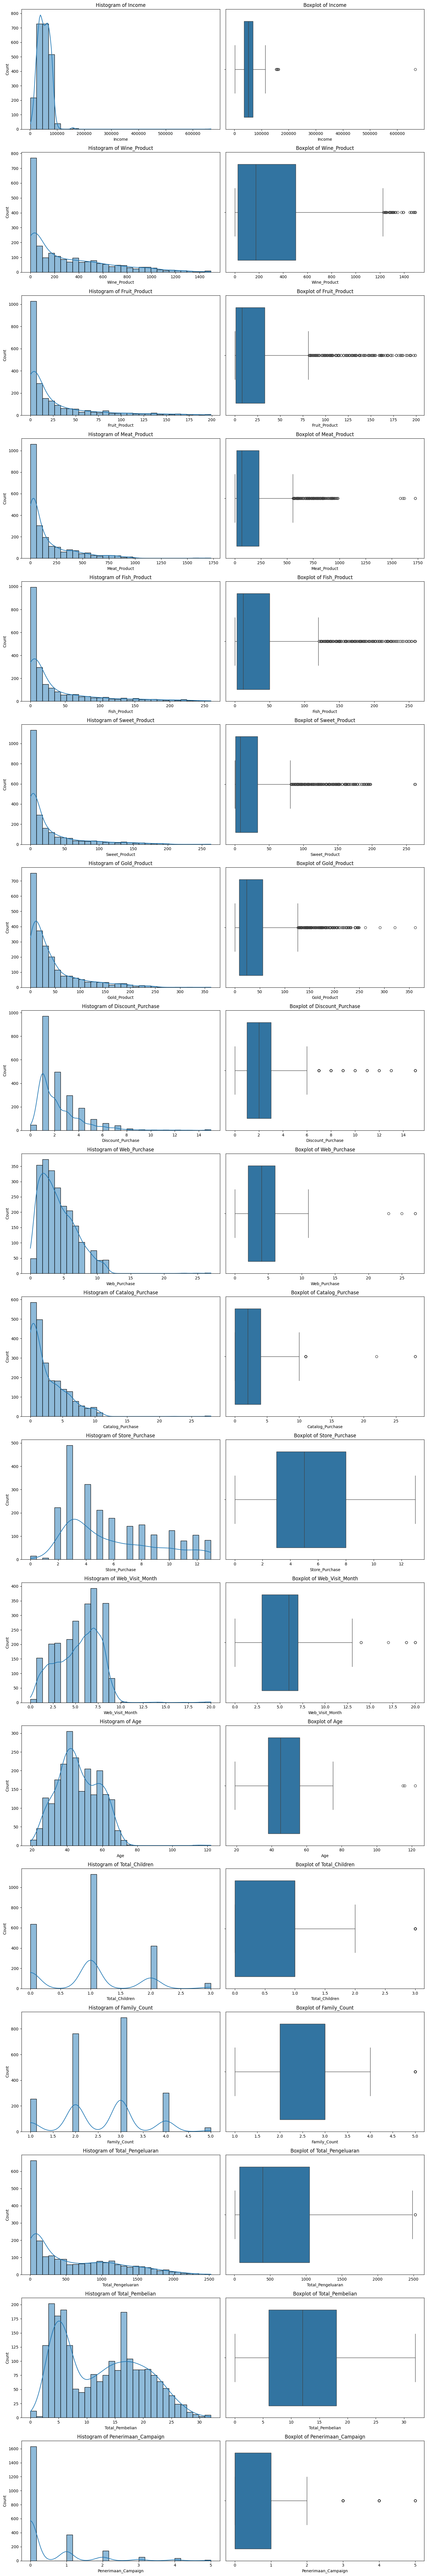

In [36]:
# Memilih hanya kolom bertipe integer dan float
int_float_col = sc_analysis.select_dtypes(include=['int','float']).columns

# Visualisasi distribusi kolom integer dan float dengan histogram dan boxplot
number_col = len(int_float_col)
fig, axes = plt.subplots(number_col, 2, figsize=(15, number_col * 5))

for i, col in enumerate(int_float_col):
    # Histogram
    sns.histplot(sc_analysis[col], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')
    
    # Boxplot
    sns.boxplot(x=sc_analysis[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [37]:
# Menetapkan Batas Atas dan Bawah untuk kolom 'Age' dan 'Income' untuk menghapus outliers
Q1 = sc_analysis[['Age','Income']].quantile(0.25)
Q3 = sc_analysis[['Age','Income']].quantile(0.75)
IQR = Q3 - Q1 # interquartile range

In [38]:
# Batas bawah dan atas untuk outliers
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(f'Batas Bawah: {batas_bawah}')
print(f'Batas Atas: {batas_atas}')

Batas Bawah: Age       11.0   
Income   -13773.0
dtype: float64
Batas Atas: Age       83.0    
Income    117725.0
dtype: float64


In [39]:
sc_analysis[sc_analysis['Income'] > 117725.0].sort_values('Income', ascending=False)[['Age_Group','Education', 'Family_Count', 'Income', 'Total_Pengeluaran', 'Total_Pembelian']]

,Age_Group,Education,Family_Count,Income,Total_Pengeluaran,Total_Pembelian
2233,Gen X 36-50,Undergraduate,3,666666.0,62,7
617,Gen X 36-50,Postgraduate,4,162397.0,107,1
687,Millenials 21-35,Postgraduate,2,160803.0,1717,29
1300,Gen X 36-50,Postgraduate,3,157733.0,59,2
164,Gen X 36-50,Postgraduate,3,157243.0,1608,22
1653,Gen X 36-50,Undergraduate,2,157146.0,1730,28
2132,Boomers 51-69,Postgraduate,2,156924.0,8,0
655,Gen X 36-50,Undergraduate,1,153924.0,6,0


In [40]:
sc_analysis[sc_analysis['Age'] > 85].sort_values('Age', ascending=False)[['Age', 'Income', 'Education', 'Family_Count', 'Income', 'Total_Pengeluaran', 'Total_Pembelian']]

,Age,Income,Education,Family_Count,Income,Total_Pengeluaran,Total_Pembelian
239,122,60182.0,Postgraduate,2,60182.0,22,3
339,116,83532.0,Postgraduate,2,83532.0,1853,14
192,115,36640.0,Postgraduate,2,36640.0,65,5


In [41]:
# Menghapus (drop) outliers berdasarkan batas atas yang telah ditentukan
sc_analysis = sc_analysis[sc_analysis['Age'] < 83]
sc_analysis = sc_analysis[sc_analysis['Income'] < 200000.0]

In [42]:
# Dekripsi Data yang Siap Analisis
item_list = []
for col in sc_analysis.columns :
    item_list.append([col, sc_analysis[col].dtype, sc_analysis[col].isna().sum(),
                    sc_analysis[col].nunique(), list(sc_analysis[col].drop_duplicates().sample(2).values)]);

sc_analysis_desc = pd.DataFrame(columns=['data_column', 'data_type', 'null', 'unique', 'unique_sample'],
                     data=item_list)
print(sc_analysis.shape)
sc_analysis_desc

(2236, 23)


,data_column,data_type,null,unique,unique_sample
0,Education,object,0,3,"[School, Postgraduate]"
1,Marital_Status,object,0,2,"[Alone, Couple]"
2,Income,float64,0,1994,"[30081.0, 59432.0]"
3,Wine_Product,int64,0,775,"[861, 447]"
4,Fruit_Product,int64,0,158,"[189, 178]"
5,Meat_Product,int64,0,557,"[864, 606]"
6,Fish_Product,int64,0,182,"[29, 81]"
7,Sweet_Product,int64,0,177,"[22, 118]"
8,Gold_Product,int64,0,213,"[45, 54]"
9,Discount_Purchase,int64,0,15,"[15, 12]"


**`Export Data`**

In [ ]:
# # Menyimpan Dataframe ke dalam file Excel
# sc_analysis.to_excel('Supermarket_Customers_Fix.xlsx', index=False)

# **3. Data Analysis & Visualization**

**`Strategi Pasar`**

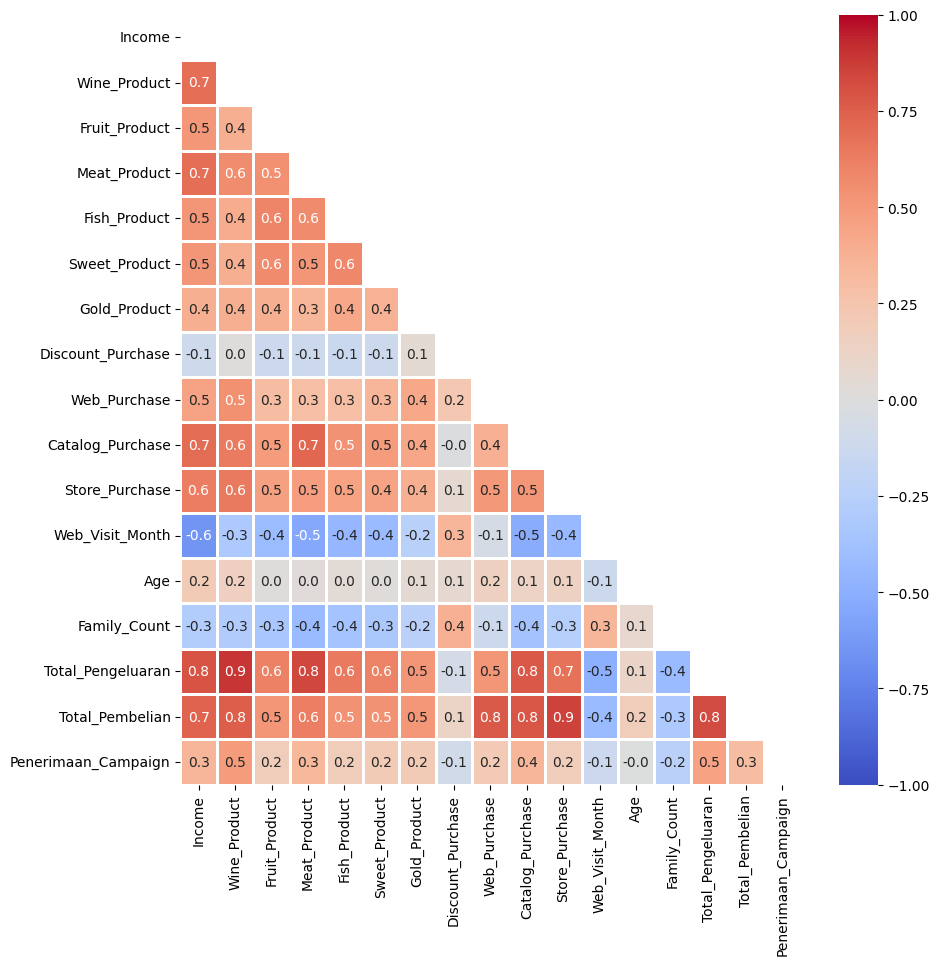

In [ ]:
# analisis korelasi antar variabel numerik
corr_var = sc_analysis[['Income', 'Wine_Product', 'Fruit_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product', 'Gold_Product', 
                        'Discount_Purchase', 'Web_Purchase', 'Catalog_Purchase','Store_Purchase', 'Web_Visit_Month', 'Age', 'Family_Count', 
                        'Total_Pengeluaran','Total_Pembelian', 'Penerimaan_Campaign']].corr()

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(corr_var))
sns.heatmap(corr_var, 
            mask=mask, linewidths=1, annot_kws={'size':10},   #type: ignore
            annot=True, fmt='.1f', cmap='coolwarm',
            vmin=-1, vmax=1);

> Interpretasi:

1. **Pendapatan sebagai Faktor Kunci**
    - Proxy untuk Perilaku Konsumen:
        - Income memiliki korelasi kuat dengan Total Pengeluaran, Total Pembelian, dan produk premium seperti Wine dan Meat.   
        - Strategi: Fokus pada segmen berpenghasilan tinggi dengan produk premium melalui kampanye eksklusif dan katalog.

    - Hubungan dengan Aktivitas Web:
        - Income berkorelasi negatif dengan Web Visit dan Web Purchase, menunjukkan bahwa pelanggan dengan pendapatan tinggi lebih jarang mengunjungi situs dan cenderung melakukan pembelian langsung.
        - Strategi: Buat promosi langsung di toko dan optimalkan pengalaman belanja fisik.
    
    <br>

2. **Preferensi Metode Pembelian**
    - Pembelian di Toko:
        - Korelasi positif antara Store Purchase dan Total Pembelian menunjukkan bahwa pelanggan cenderung membeli lebih banyak secara langsung.
        - Strategi: Adakan promo eksklusif di toko dan program loyalitas untuk meningkatkan volume pembelian.

    - Pembelian Online:
        - Web Purchase memiliki korelasi lebih rendah dengan Income, menandakan bahwa pelanggan berpenghasilan rendah lebih memilih belanja online.
        - Strategi: Tawarkan diskon atau cashback untuk pembelian online guna meningkatkan transaksi.

    - Pembelian Katalog:
        - Pelanggan berpenghasilan tinggi cenderung melakukan Catalog Purchase.
        - Strategi: Kirim katalog khusus berisi produk premium secara berkala kepada pelanggan setia.

    <br>

3. **Produk Terlaris**
    - Produk Premium:
        - Wine adalah produk paling populer, baik secara keseluruhan maupun melalui semua metode pembelian.
        - Strategi: Maksimalkan promosi anggur pada semua kanal penjualan.

    - Produk Segar:
        - Meat, Fish, dan Fruit lebih jarang dibeli secara online, mungkin karena pelanggan ingin melihat langsung kualitasnya.
        - Strategi: Fokuskan promosi produk segar pada toko fisik dan katalog.

    <br>

4. **Perilaku Belanja Berdasarkan Ukuran Keluarga**
    - Keluarga Besar:
        - Korelasi negatif antara Family Count dan Income menunjukkan bahwa keluarga besar cenderung memiliki daya beli lebih rendah.
    - Mereka lebih tertarik pada Diskon dan sering melakukan Web Visit.
    - Strategi: Sediakan program diskon keluarga dan paket hemat, terutama pada kanal online.

    <br>
    
5. **Kampanye Pemasaran**
    - Pelanggan dengan pendapatan lebih tinggi lebih responsif terhadap kampanye.
    - Strategi: Segmentasikan kampanye berdasarkan pendapatan dengan pendekatan eksklusif untuk pelanggan premium dan program diskon untuk keluarga besar.

**`Pengeluaran Pelanggan`**

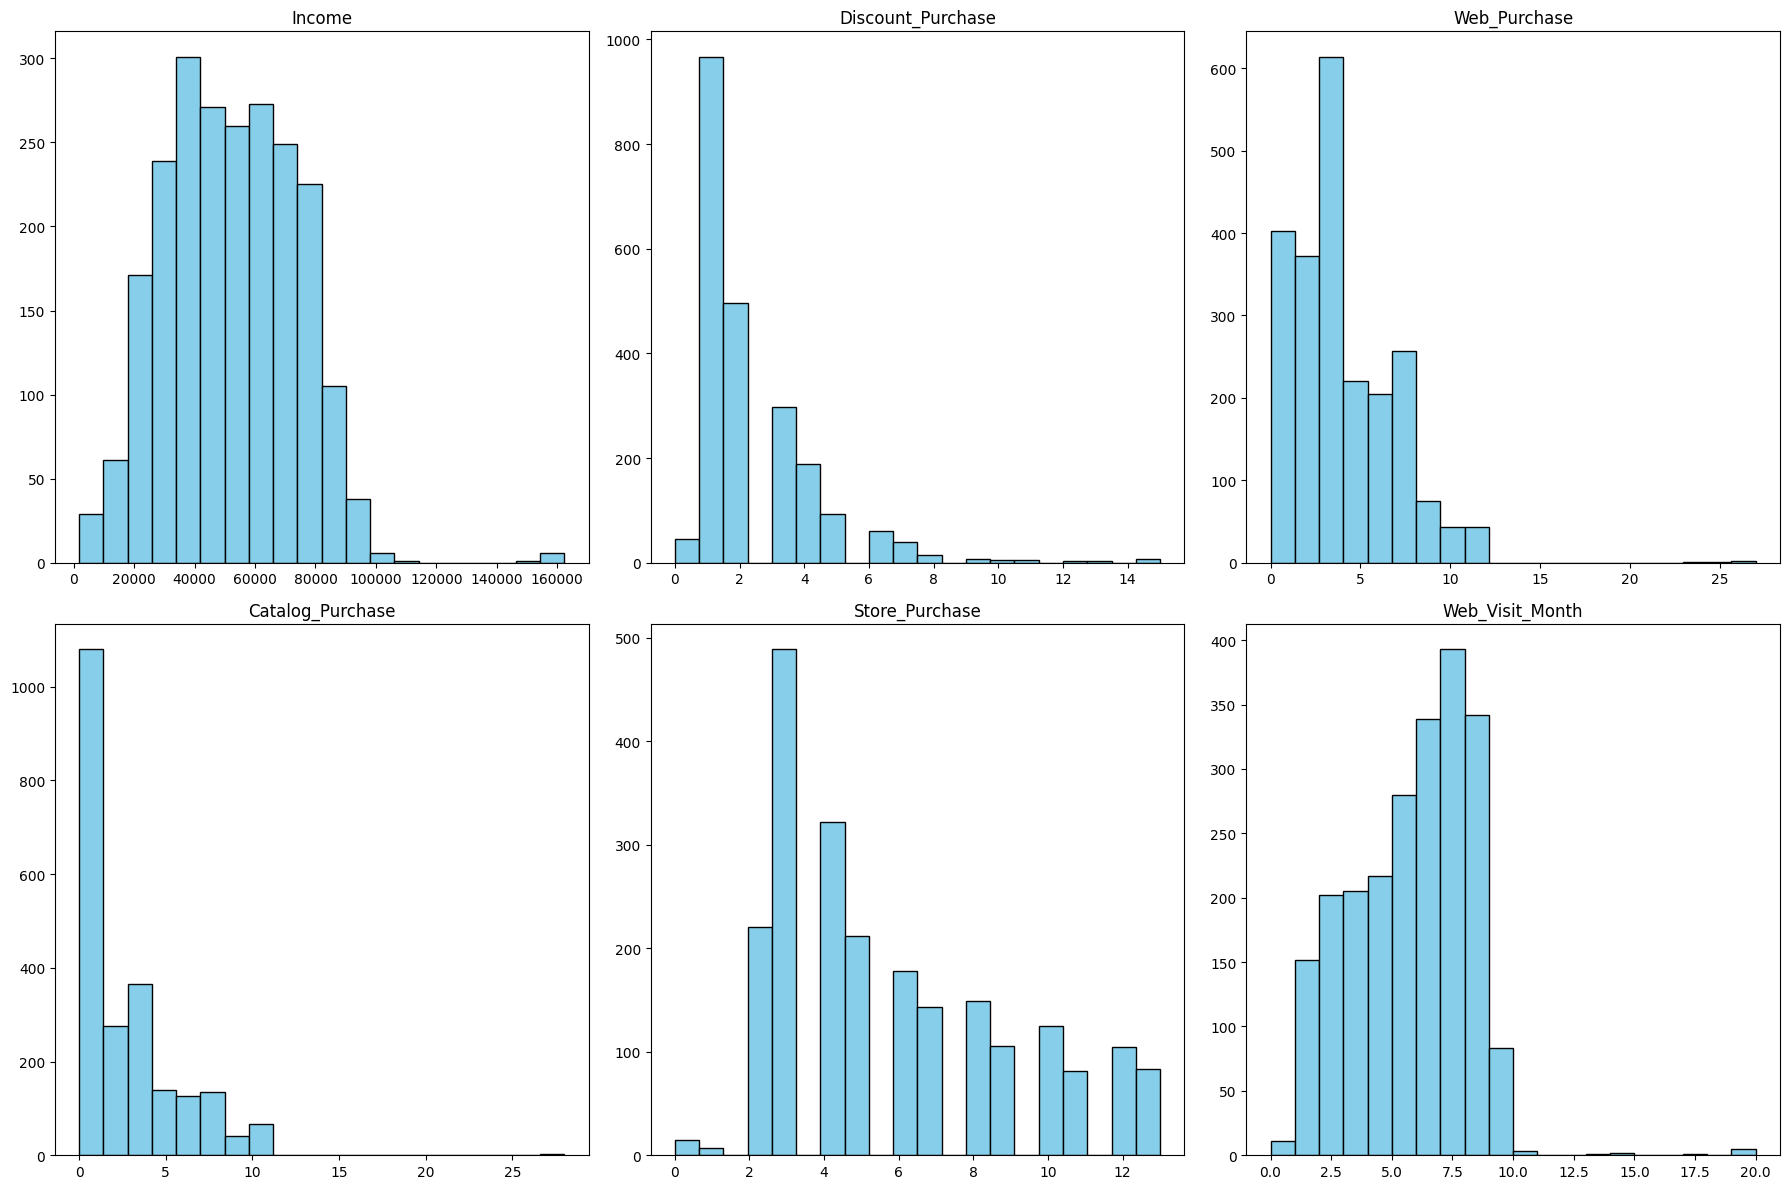

In [86]:
# Pilih 4 variabel yang akan ditampilkan
selected_columns = ['Income', 'Discount_Purchase', 'Web_Purchase', 'Catalog_Purchase', 
                    'Store_Purchase', 'Web_Visit_Month']

# Buat figure dengan ukuran 18x12 inci dan grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop untuk membuat histogram dari setiap variabel terpilih
for i, col in enumerate(selected_columns):
    ax = axes[i // 3, i % 3]  # Mengatur posisi subplot
    ax.hist(sc_analysis[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)

# Menata layout agar tidak bertumpukan
plt.tight_layout()
plt.show()

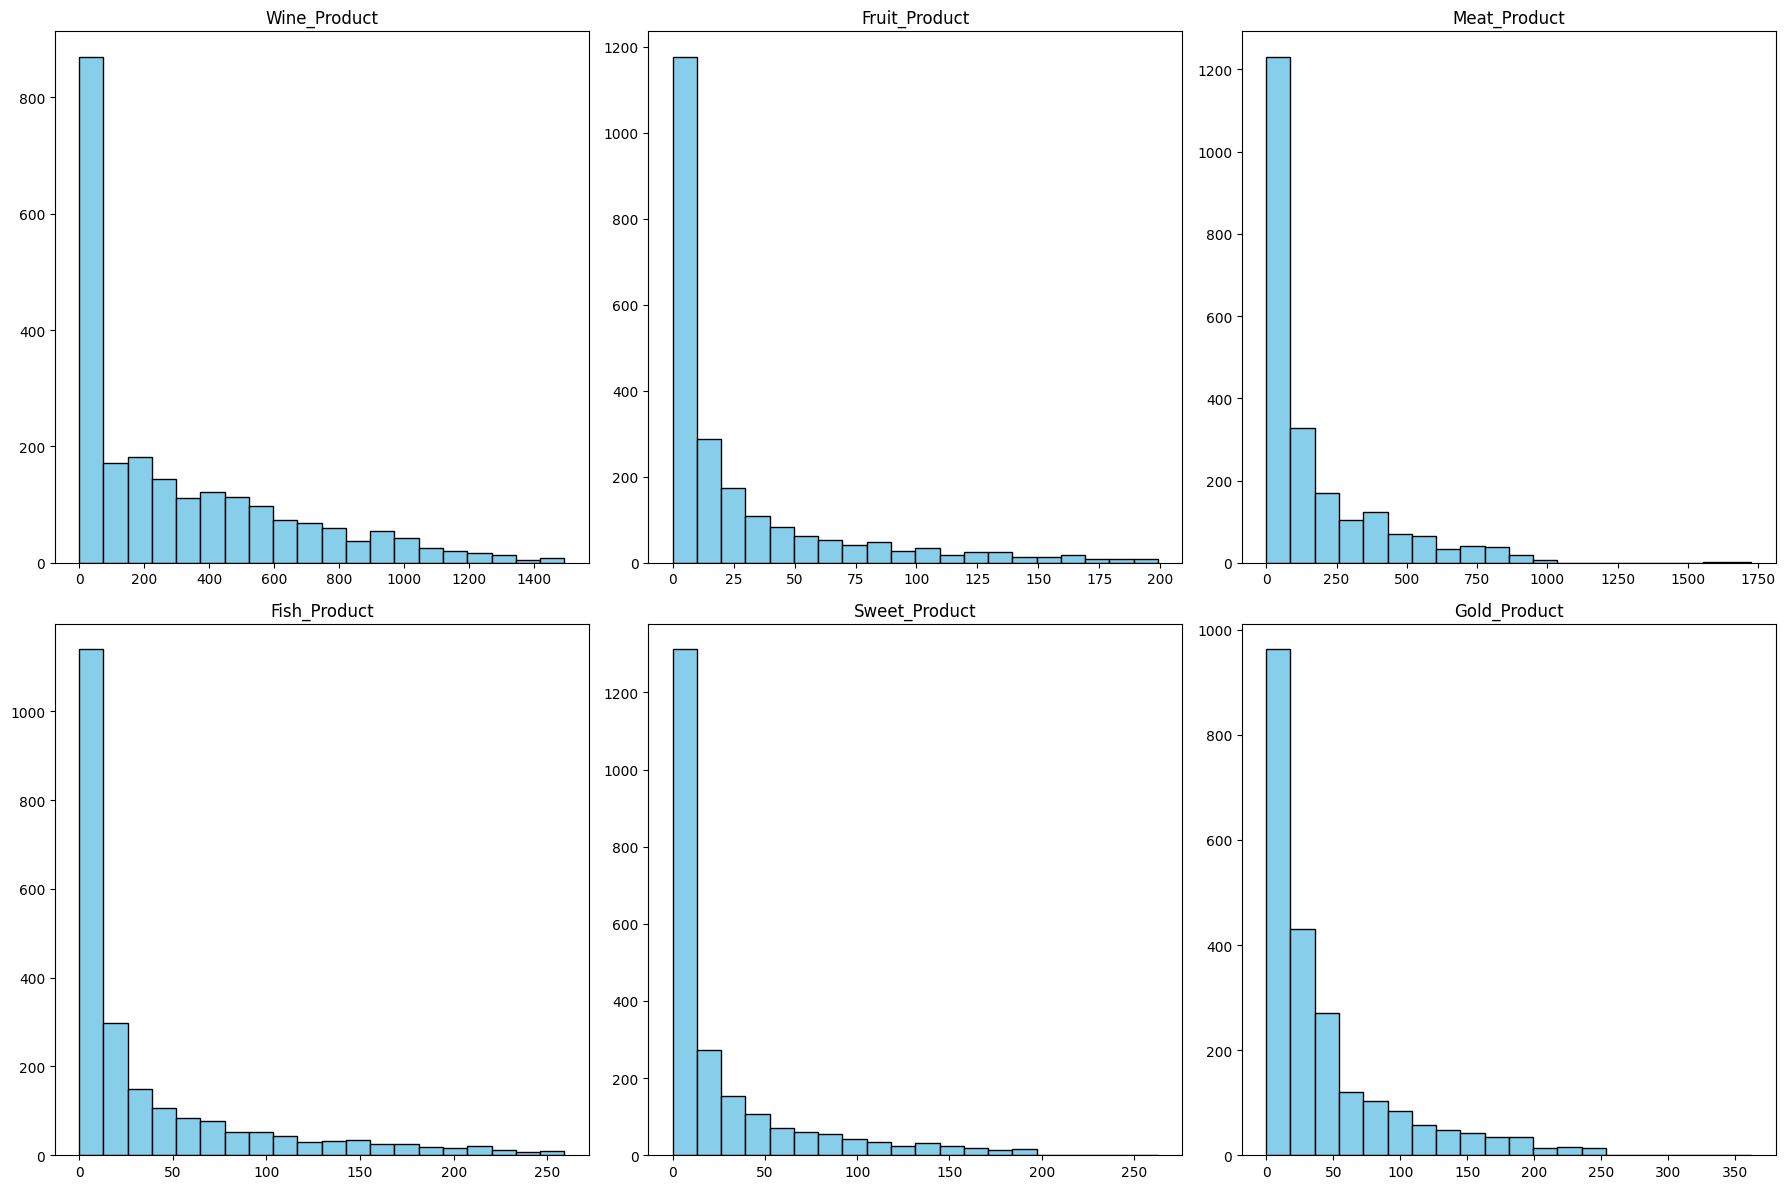

In [88]:
# Pilih 4 variabel yang akan ditampilkan
selected_columns = ['Wine_Product','Fruit_Product', 'Meat_Product', 'Fish_Product', 
                    'Sweet_Product', 'Gold_Product']

# Buat figure dengan ukuran 18x12 inci dan grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop untuk membuat histogram dari setiap variabel terpilih
for i, col in enumerate(selected_columns):
    ax = axes[i // 3, i % 3]  # Mengatur posisi subplot
    ax.hist(sc_analysis[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)

# Menata layout agar tidak bertumpukan
plt.tight_layout()
plt.show()

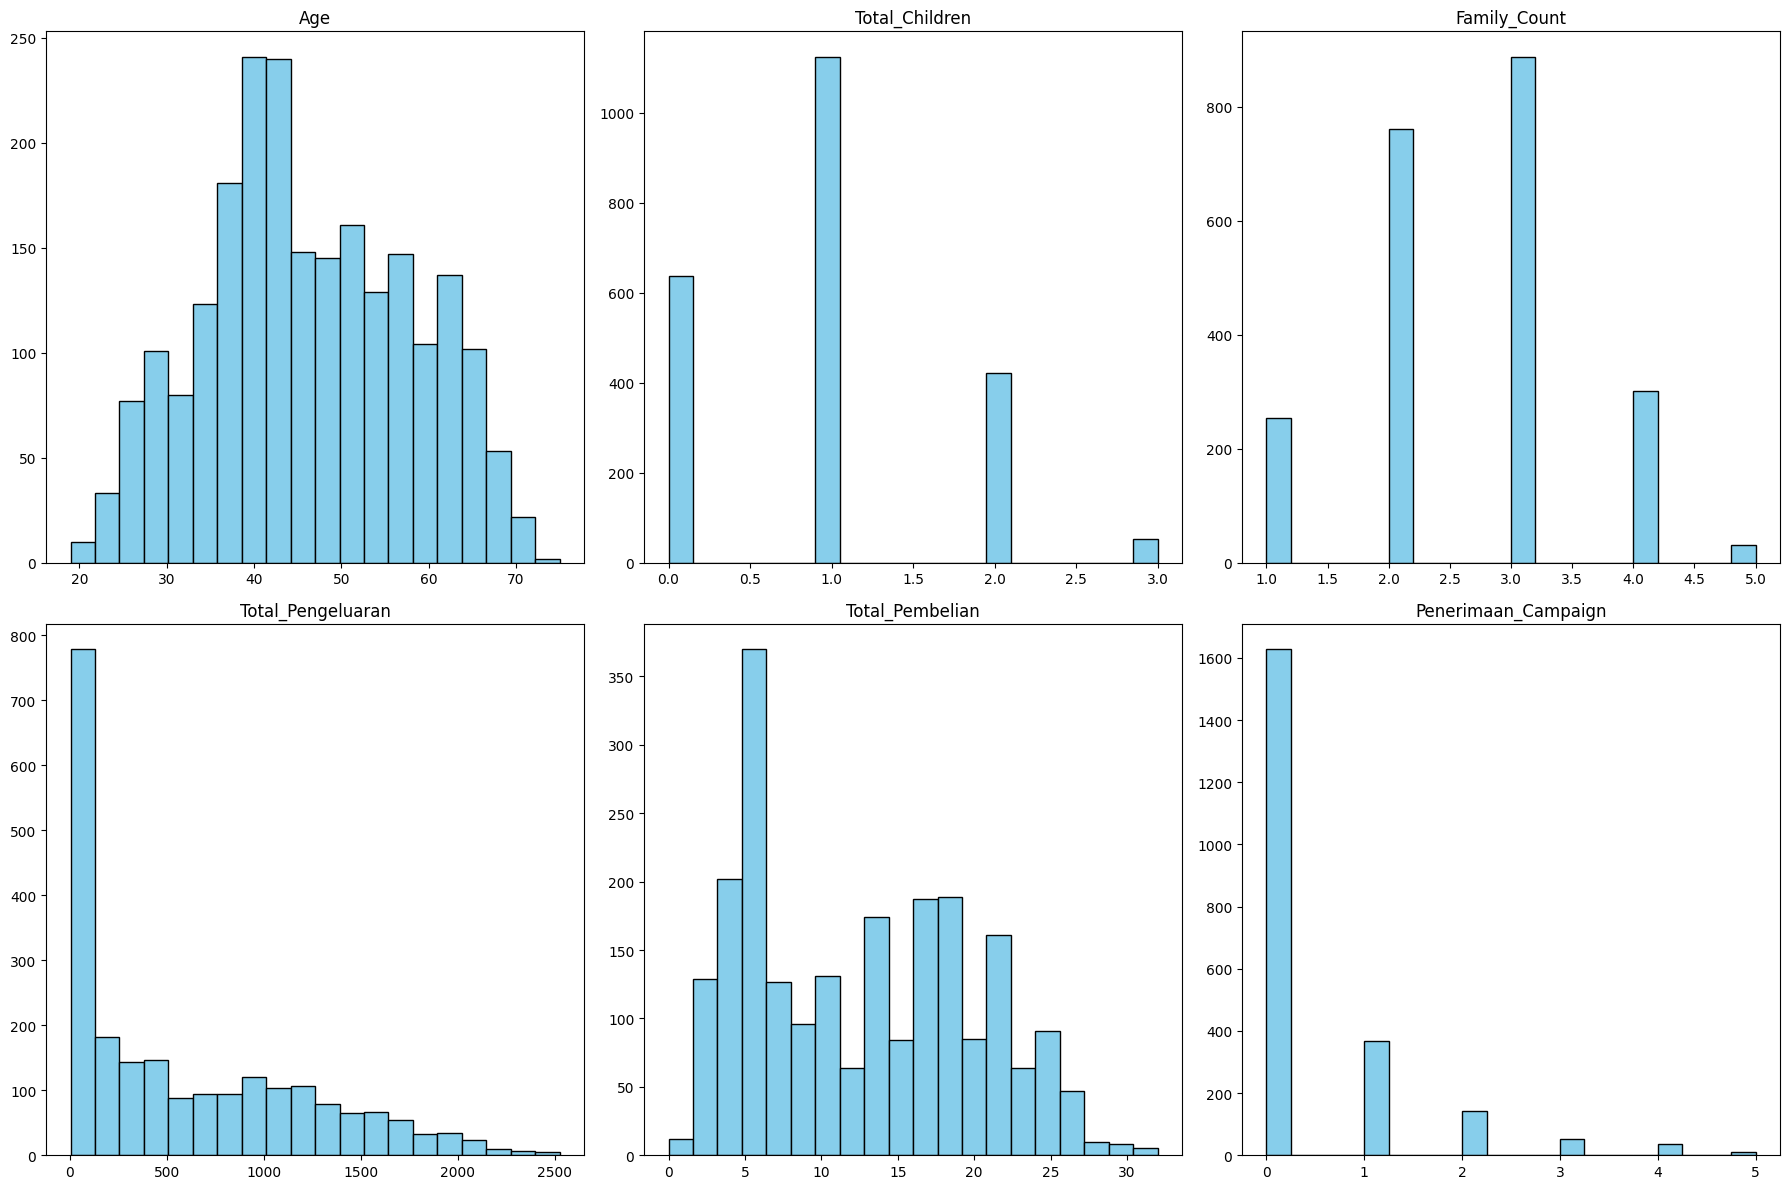

In [90]:
# Pilih 4 variabel yang akan ditampilkan
selected_columns = ['Age', 'Total_Children', 'Family_Count', 'Total_Pengeluaran', 
                    'Total_Pembelian', 'Penerimaan_Campaign']

# Buat figure dengan ukuran 18x12 inci dan grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Loop untuk membuat histogram dari setiap variabel terpilih
for i, col in enumerate(selected_columns):
    ax = axes[i // 3, i % 3]  # Mengatur posisi subplot
    ax.hist(sc_analysis[col], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(col)

# Menata layout agar tidak bertumpukan
plt.tight_layout()
plt.show()

**`Demografi Pelanggan`**

C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\2452087417.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sc_analysis, x='Education', edgecolor='k', palette=palette1, ax=axes1[0, 0])
C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\2452087417.py:9: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(data=sc_analysis, x='Education', edgecolor='k', palette=palette1, ax=axes1[0, 0])
C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\2452087417.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sc_analysis, x='Education', y='Total_Pengeluaran', errorbar=None, estimator='median', pale

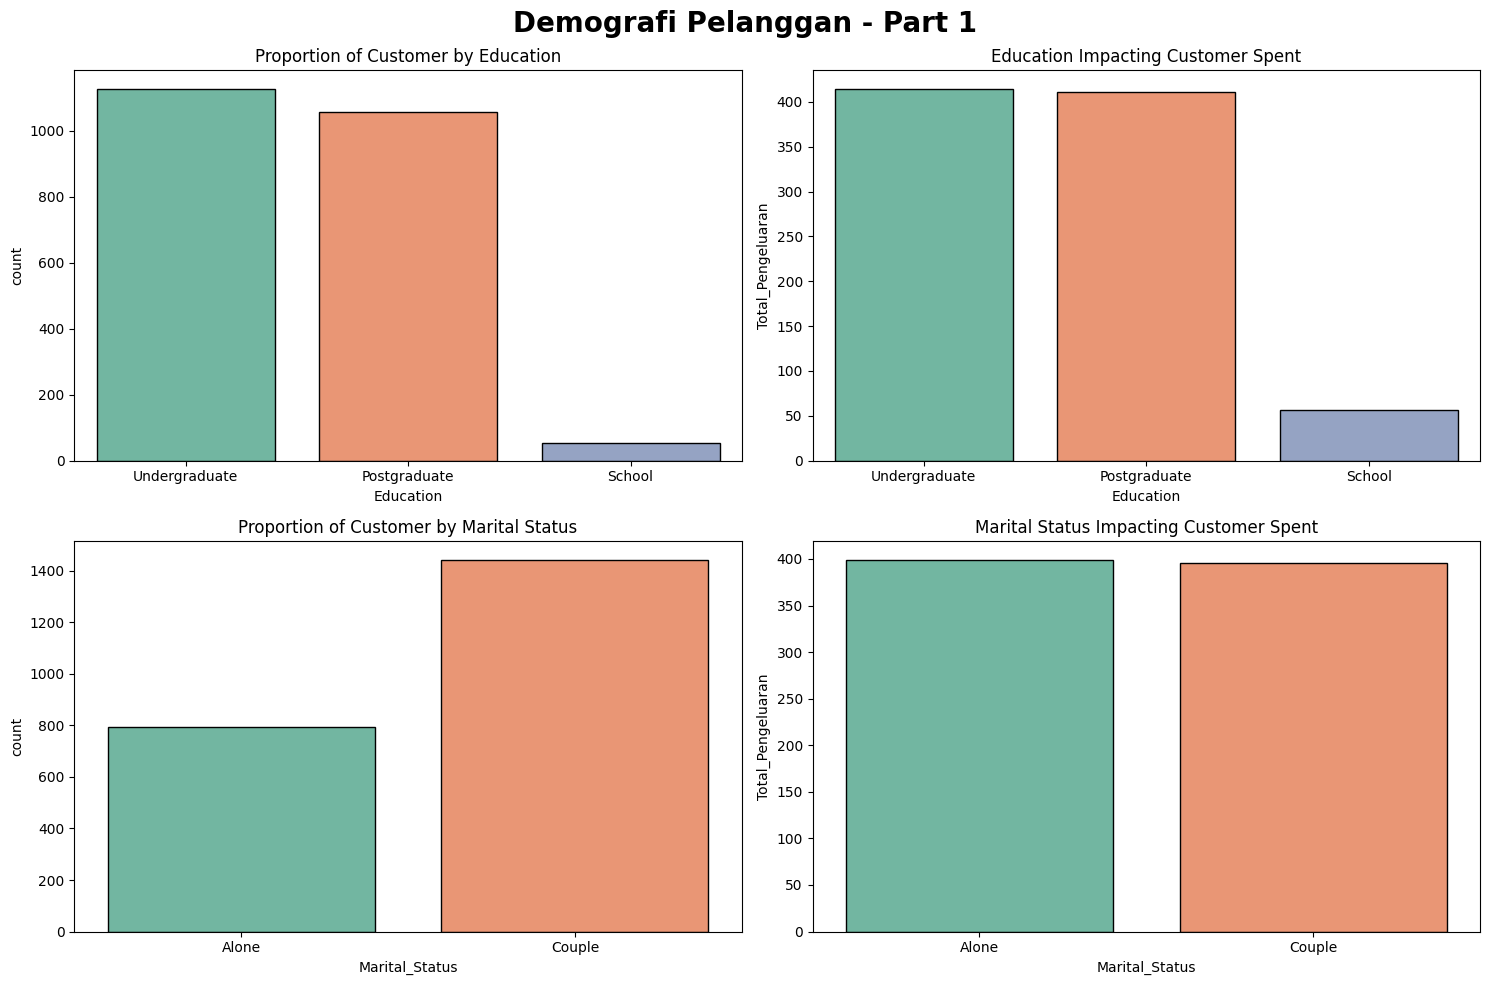

In [104]:
# Membuat palet warna yang berbeda untuk setiap grafik
palette1 = sns.color_palette("Set2")

# Membuat figure pertama (2x2)
fig1, axes1 = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Demografi Pelanggan - Part 1', size=20, fontweight='bold')

# Plot pada grid pertama (2x2) dengan palet warna berbeda
sns.countplot(data=sc_analysis, x='Education', edgecolor='k', palette=palette1, ax=axes1[0, 0])
axes1[0, 0].set_title('Proportion of Customer by Education')

sns.barplot(data=sc_analysis, x='Education', y='Total_Pengeluaran', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes1[0, 1])
axes1[0, 1].set_title('Education Impacting Customer Spent')

sns.countplot(data=sc_analysis, x='Marital_Status', edgecolor='k', palette=palette1, ax=axes1[1, 0])
axes1[1, 0].set_title('Proportion of Customer by Marital Status')

sns.barplot(data=sc_analysis, x='Marital_Status', y='Total_Pengeluaran', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes1[1, 1])
axes1[1, 1].set_title('Marital Status Impacting Customer Spent')

# Mengatur tata letak agar lebih rapi
plt.tight_layout()
plt.show()

> Interpretasi:

1. `Education`
    - Mayoritas pelanggan berasal dari kategori `Undergraduate` dan `Postgraduate` Education, dengan jumlah yang cukup seimbang.
    - Pelanggan dengan latar belakang pendidikan `School` memiliki proporsi yang jauh lebih kecil dibandingkan dua kategori lainnya.
    - Pelanggan dengan latar belakang pendidikan `Undergraduate` dan `Postgraduate` Education memiliki pengeluaran yang hampir sama, yang relatif tinggi.
    - Pelanggan dengan latar belakang pendidikan `School` memiliki pengeluaran yang jauh lebih rendah dibandingkan dua kelompok lainnya.

2. `Marital Status`
    - Sebagian besar pelanggan berada dalam status `Couple` dibandingkan dengan `Alone`, menunjukkan bahwa pelanggan yang sudah berpasangan lebih mendominasi.
    - Baik pelanggan yang `Alone` maupun `Couple` memiliki jumlah pengeluaran yang hampir sama, tidak ada perbedaan signifikan.


C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\1570264751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sc_analysis, x='Family_Count', edgecolor='k', palette=palette1, ax=axes2[0, 0])
C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\1570264751.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(data=sc_analysis, x='Family_Count', edgecolor='k', palette=palette1, ax=axes2[0, 0])
C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\1570264751.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sc_analysis, x='Family_Count', y='Total_Pengeluaran', errorbar=None, estimator='medi

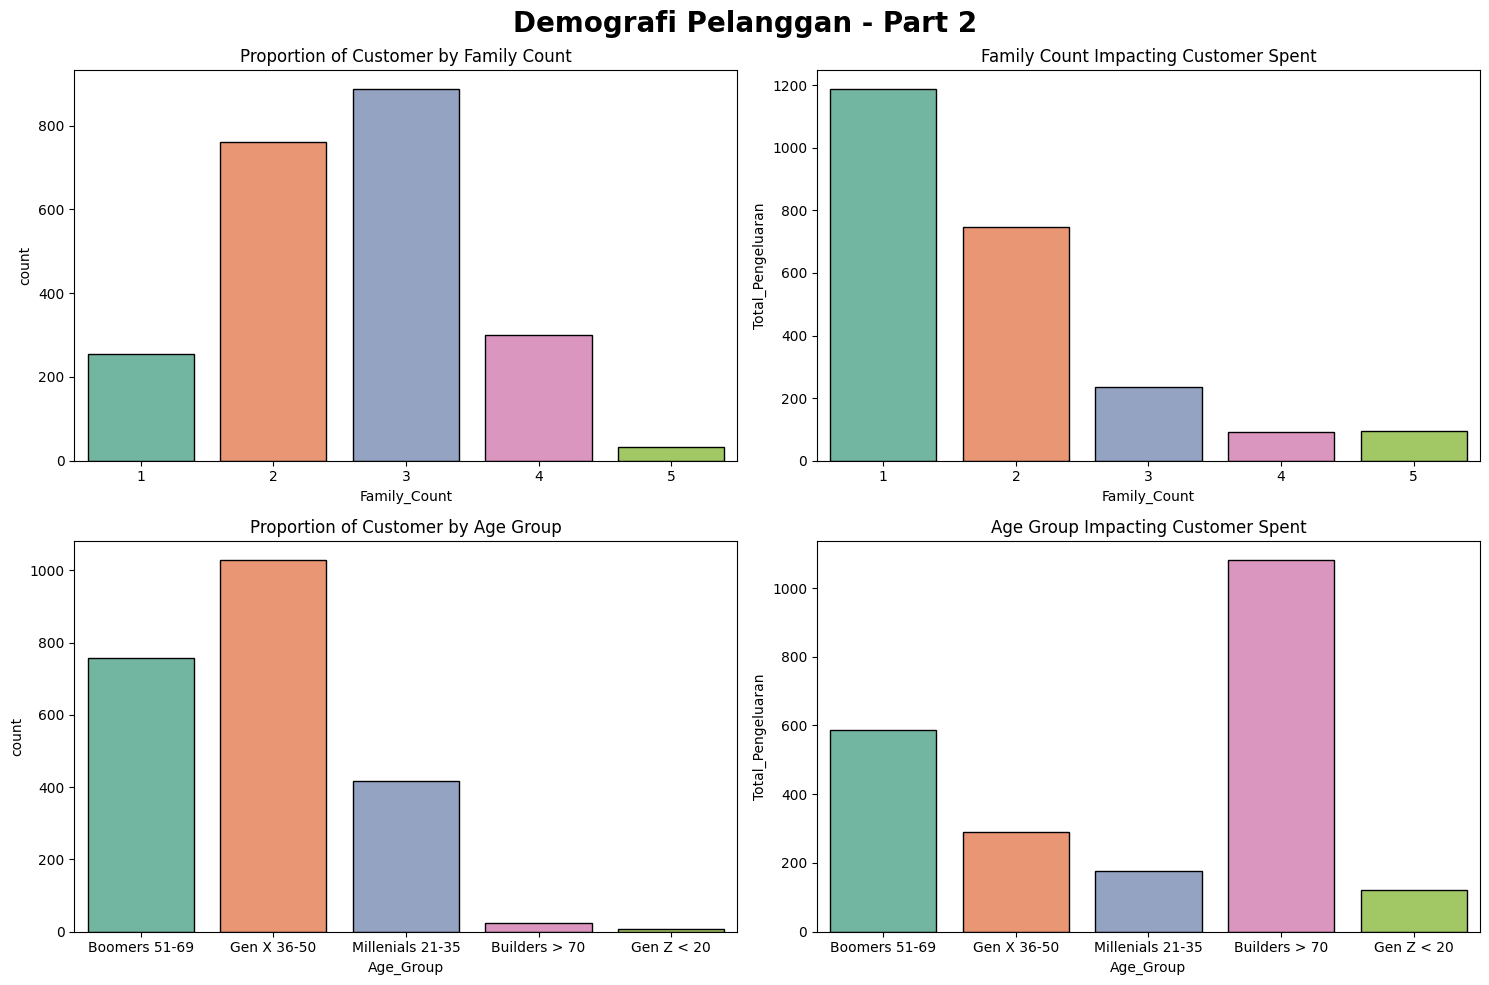

In [105]:
# Membuat palet warna yang berbeda untuk setiap grafik pada figure kedua
palette1 = sns.color_palette("Set2")

# Membuat figure kedua (2x2)
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
plt.suptitle('Demografi Pelanggan - Part 2', size=20, fontweight='bold')

# Plot pada grid kedua (2x2) dengan palet warna berbeda
sns.countplot(data=sc_analysis, x='Family_Count', edgecolor='k', palette=palette1, ax=axes2[0, 0])
axes2[0, 0].set_title('Proportion of Customer by Family Count')

sns.barplot(data=sc_analysis, x='Family_Count', y='Total_Pengeluaran', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes2[0, 1])
axes2[0, 1].set_title('Family Count Impacting Customer Spent')

sns.countplot(data=sc_analysis, x='Age_Group', edgecolor='k', palette=palette1, ax=axes2[1, 0])
axes2[1, 0].set_title('Proportion of Customer by Age Group')

sns.barplot(data=sc_analysis, x='Age_Group', y='Total_Pengeluaran', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes2[1, 1])
axes2[1, 1].set_title('Age Group Impacting Customer Spent')

# Mengatur tata letak agar lebih rapi
plt.tight_layout()
plt.show()

> Interpretasi:

3. `Family`
    - Mayoritas pelanggan berada pada ukuran keluarga 3 dan 2, dengan jumlah tertinggi pada 3 anggota keluarga.
    - Ukuran keluarga 4 dan 5 memiliki proporsi yang jauh lebih kecil.
    - Pelanggan dengan ukuran keluarga 1 memiliki pengeluaran tertinggi, diikuti oleh ukuran keluarga 2.
    - Pengeluaran menurun secara signifikan pada keluarga dengan 3, 4, dan 5 anggota.

4. `Age Group`
    - Sebagian besar pelanggan berasal dari kelompok usia `Gen X (36-50)` dan `Boomers (51-69)`.
    - Kelompok usia `Millennials (21-35)` memiliki jumlah yang cukup signifikan tetapi lebih rendah dibandingkan dua kelompok sebelumnya.
    - Pelanggan dari kelompok `Builders (>70)` dan `Gen Z (<20)` sangat sedikit.
    - Kelompok usia `Builders (>70)` memiliki pengeluaran tertinggi.
    - Diikuti oleh `Boomers (51-69)`, sementara `Gen X (36-50)` dan `Millennials (21-35)` memiliki pengeluaran lebih rendah.
    - `Gen Z (<20)` memiliki pengeluaran paling sedikit.


**`Pengaruh Income terhadap Perilaku Pembelian Pelanggan`**

C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\1350317872.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sc_analysis, x='Income_Categories', y='Discount_Purchase', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes[0, 0])
C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\1350317872.py:13: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=sc_analysis, x='Income_Categories', y='Discount_Purchase', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes[0, 0])
C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\1350317872.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

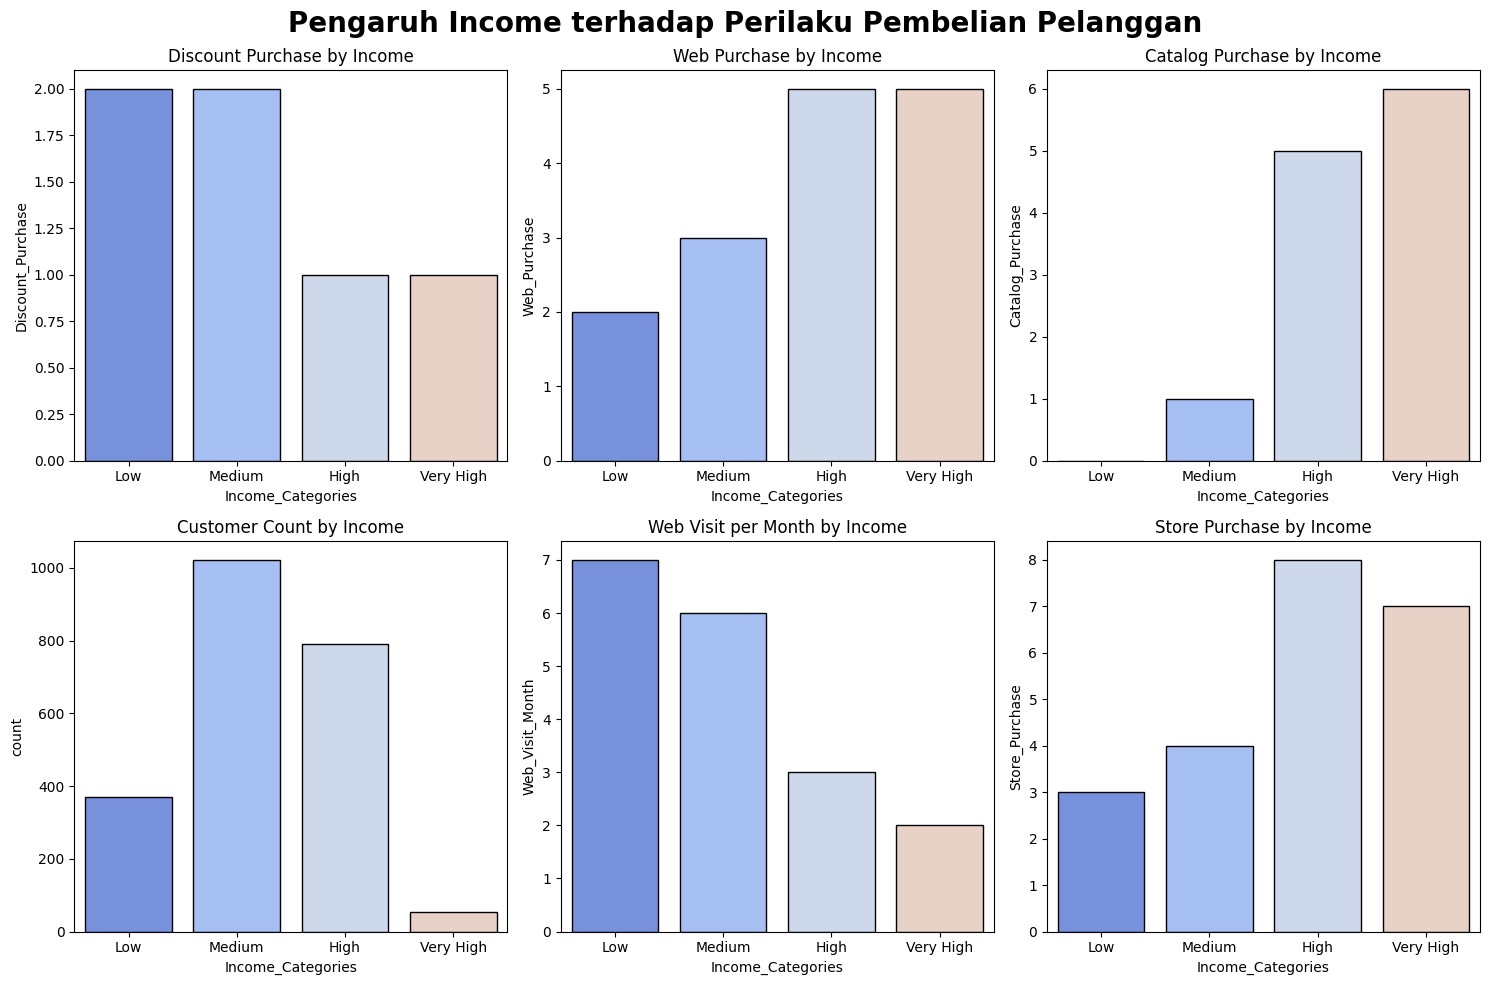

In [155]:
# Mengimpor library yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat palet warna yang berbeda untuk setiap plot
palette1 = sns.color_palette("coolwarm")

# Membuat figure dengan 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Pengaruh Income terhadap Perilaku Pembelian Pelanggan', size=20, fontweight='bold')

# Plot pada grid dengan palet warna berbeda
sns.barplot(data=sc_analysis, x='Income_Categories', y='Discount_Purchase', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes[0, 0])
axes[0, 0].set_title('Discount Purchase by Income')

sns.barplot(data=sc_analysis, x='Income_Categories', y='Web_Purchase', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes[0, 1])
axes[0, 1].set_title('Web Purchase by Income')

sns.barplot(data=sc_analysis, x='Income_Categories', y='Catalog_Purchase', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes[0, 2])
axes[0, 2].set_title('Catalog Purchase by Income')

sns.countplot(data=sc_analysis, x='Income_Categories', palette=palette1, edgecolor='k', ax=axes[1, 0])
axes[1, 0].set_title('Customer Count by Income')

sns.barplot(data=sc_analysis, x='Income_Categories', y='Web_Visit_Month', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes[1, 1])
axes[1, 1].set_title('Web Visit per Month by Income')

sns.barplot(data=sc_analysis, x='Income_Categories', y='Store_Purchase', errorbar=None, estimator='median', palette=palette1, edgecolor='k', ax=axes[1, 2])
axes[1, 2].set_title('Store Purchase by Income')

# Mengatur tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()


> Interpretasi:

1. Discount Purchase by Income:
    - Pelanggan dengan pendapatan rendah dan menengah memiliki tingkat pembelian dengan diskon yang lebih tinggi dibandingkan pelanggan dengan pendapatan tinggi dan sangat tinggi.
    - Hal ini menunjukkan bahwa segmen pelanggan berpendapatan rendah lebih sensitif terhadap diskon.

2. Web Purchase by Income:
    - Pelanggan dengan pendapatan tinggi dan sangat tinggi lebih sering melakukan pembelian melalui web dibandingkan dengan pelanggan berpendapatan rendah.
    - Ini menunjukkan bahwa kelompok berpendapatan tinggi cenderung nyaman berbelanja secara online.

3. Catalog Purchase by Income:
    - Pelanggan dengan pendapatan tinggi dan sangat tinggi juga lebih sering melakukan pembelian melalui katalog, sedangkan pelanggan berpendapatan rendah jarang melakukan pembelian dengan metode ini.
    - Ini mungkin karena akses dan preferensi terhadap katalog lebih dominan pada kelas ekonomi atas.

4. Customer Count by Income:
    - Mayoritas pelanggan berada pada kategori pendapatan menengah, disusul oleh tinggi, rendah, dan sangat tinggi.
    - Ini menunjukkan bahwa basis pelanggan utama perusahaan berada pada segmen menengah.

5. Web Visit per Month by Income:
    - Pelanggan dengan pendapatan rendah justru memiliki kunjungan web per bulan yang lebih tinggi dibandingkan dengan pendapatan tinggi dan sangat tinggi.
    - Meskipun sering mengunjungi situs, kelompok ini mungkin tidak melakukan pembelian online sebanyak kelompok berpendapatan tinggi.

6. Store Purchase by Income:
    - Pelanggan dengan pendapatan tinggi dan sangat tinggi cenderung lebih sering berbelanja langsung di toko dibandingkan kelompok berpendapatan rendah.
    - Ini menunjukkan bahwa meskipun mereka berdaya beli tinggi, kelompok ini masih mempertahankan kebiasaan belanja langsung.

**`Korelasi Income dengan Seluruh Produk`**

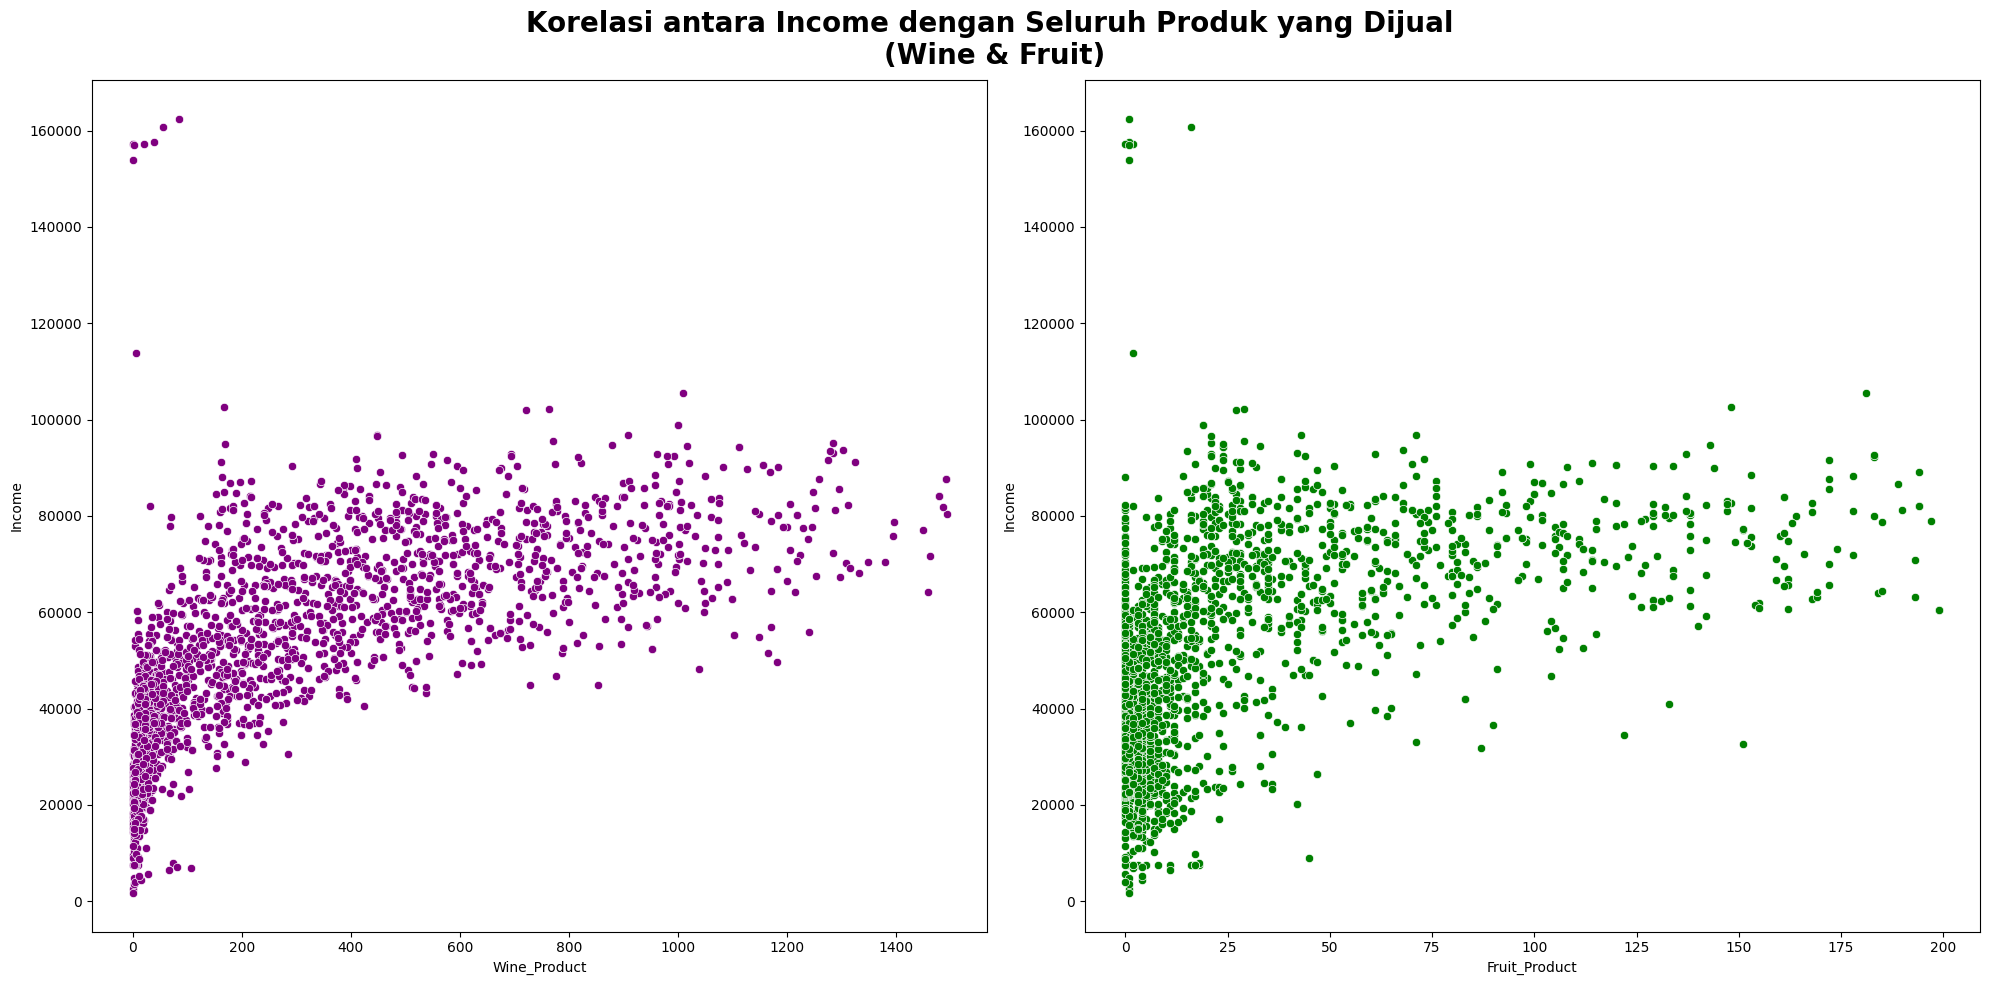

In [129]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Korelasi antara Income dengan Seluruh Produk yang Dijual \n(Wine & Fruit)', size = 20, fontweight= 'bold')
sns.scatterplot(data= sc_analysis, 
                y= 'Income', 
                x= 'Wine_Product', 
                color = 'purple',
                ax=axes[0])

sns.scatterplot(data= sc_analysis, 
                y= 'Income', 
                x= 'Fruit_Product', 
                color = 'green',
                ax=axes[1])

plt.tight_layout();

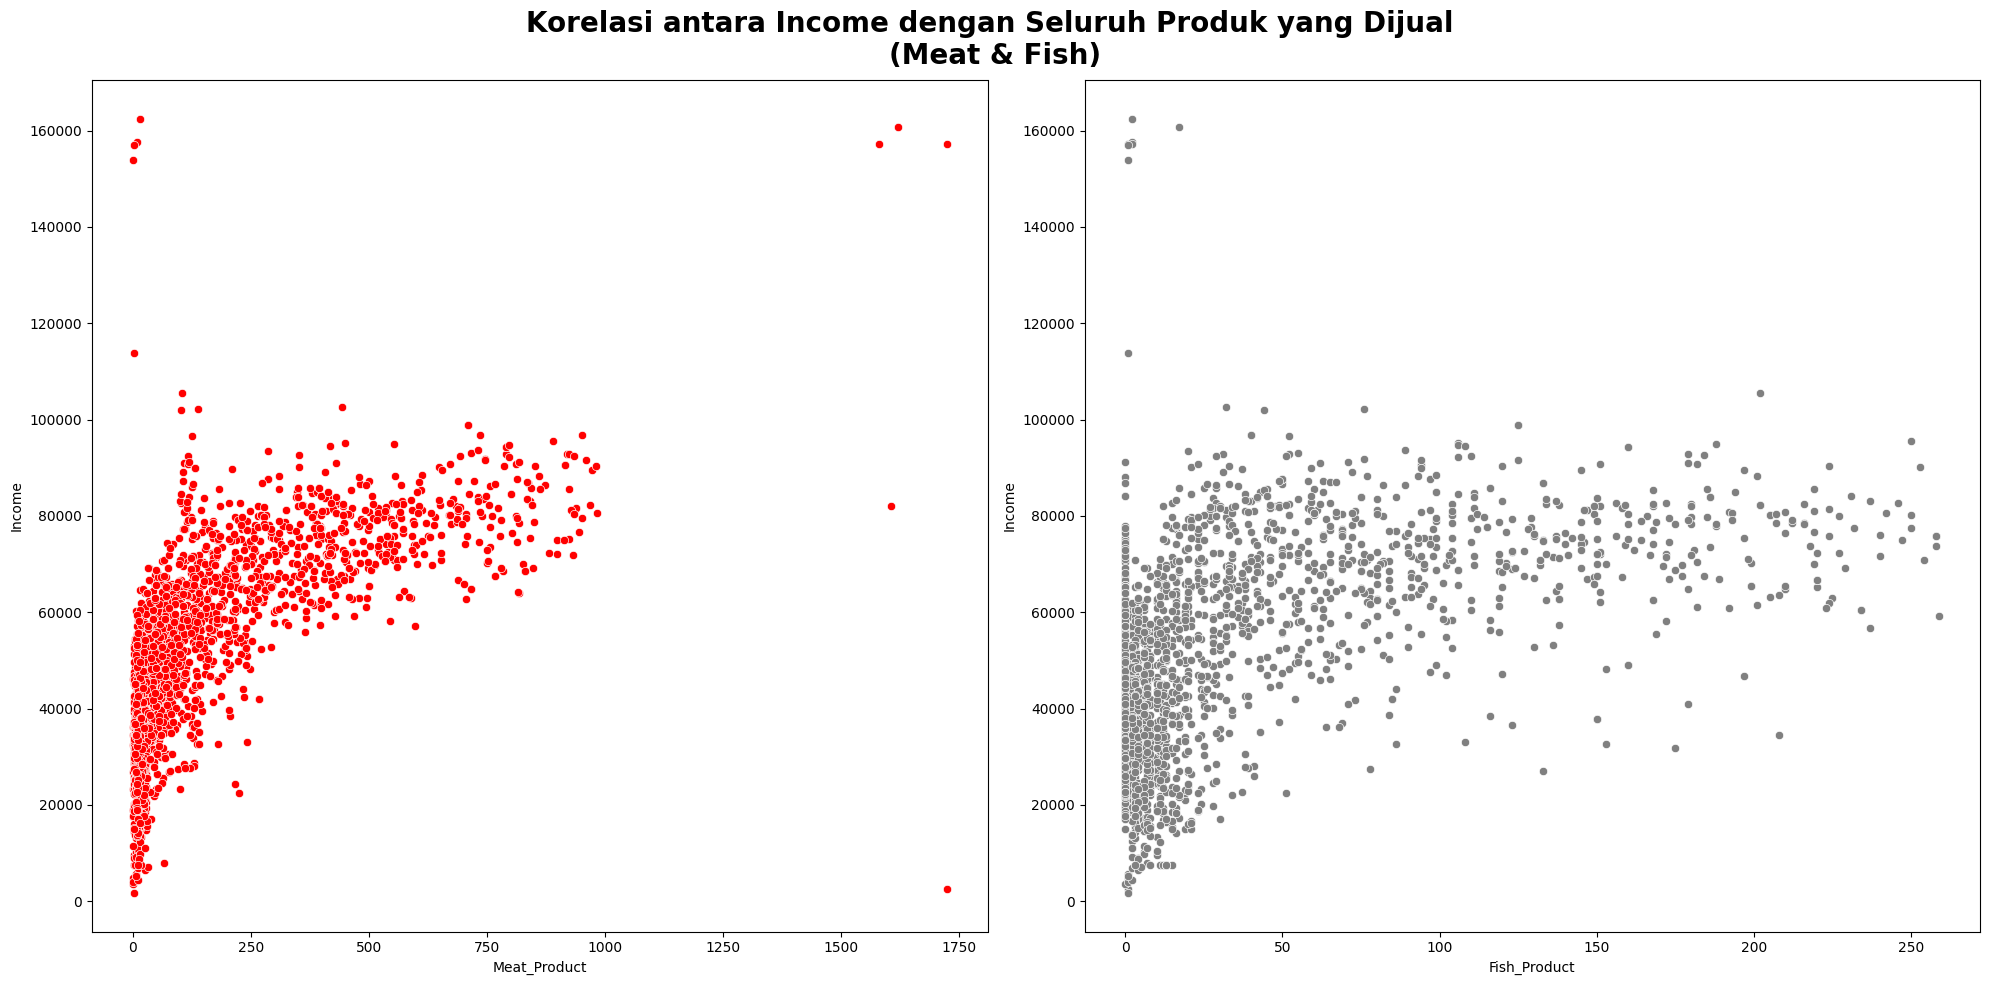

In [135]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Korelasi antara Income dengan Seluruh Produk yang Dijual \n(Meat & Fish)', size = 20, fontweight= 'bold')
sns.scatterplot(data= sc_analysis, 
                y= 'Income', 
                x= 'Meat_Product', 
                color = 'red',
                ax=axes[0])

sns.scatterplot(data= sc_analysis, 
                y= 'Income', 
                x= 'Fish_Product', 
                color = 'gray',
                ax=axes[1])

plt.tight_layout();

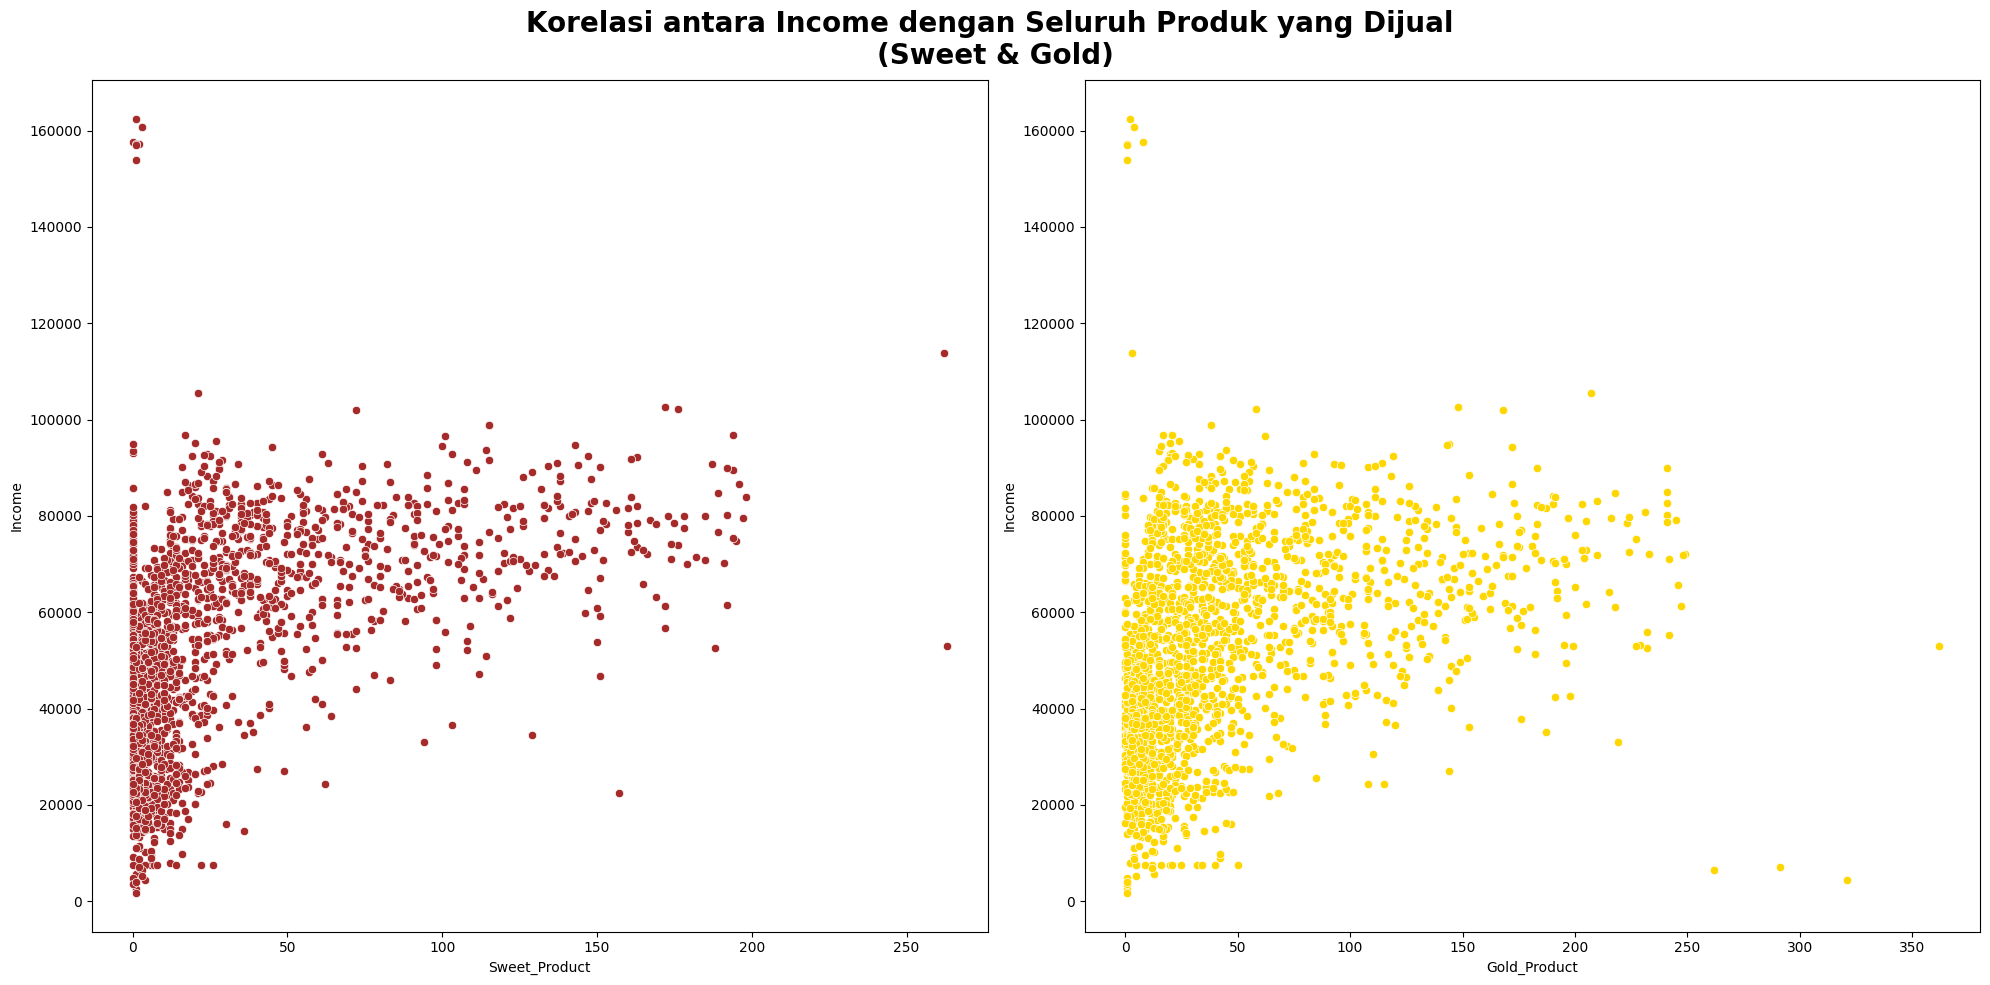

In [133]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
fig.suptitle('Korelasi antara Income dengan Seluruh Produk yang Dijual \n(Sweet & Gold)', size = 20, fontweight= 'bold')
sns.scatterplot(data= sc_analysis, 
                y= 'Income', 
                x= 'Sweet_Product', 
                color = 'brown',
                ax=axes[0])

sns.scatterplot(data= sc_analysis, 
                y= 'Income', 
                x= 'Gold_Product', 
                color = 'gold',
                ax=axes[1])

plt.tight_layout();

> Interpretasi:
1. Wine Product:
    - Terlihat adanya korelasi positif antara pendapatan (Income) dan pembelian produk wine.
    - Semakin tinggi pendapatan, semakin banyak produk wine yang dibeli.

2. Fruit Product:
    - Korelasi relatif lemah, namun ada sedikit tren positif.
    - Meskipun pendapatan naik, pembelian buah tidak meningkat signifikan.

3. Meat Product:
    - Hubungan antara pendapatan dan produk daging menunjukkan korelasi positif.  
    - Semakin tinggi pendapatan, semakin banyak pembelian produk daging.

4. Fish Product:
    - Korelasi antara pendapatan dan produk ikan tidak terlalu kuat.
    - Pembelian produk ikan terlihat menyebar pada semua rentang pendapatan.

5. Sweet Product:
    - Korelasi dengan pendapatan cenderung lemah.
    - Produk manis dibeli oleh hampir semua kelompok pendapatan, namun sedikit lebih banyak pada kelompok menengah.

6. Gold Product:
    - Korelasi juga cenderung lemah, namun ada sedikit tren positif.
    - Produk emas dibeli oleh pelanggan dengan pendapatan menengah ke atas.

**`Produk Terlaris`**

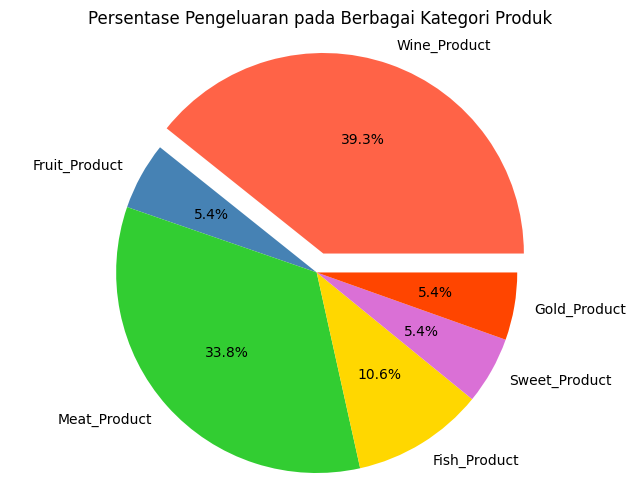

In [137]:
# Data produk
product = sc_analysis[['Wine_Product', 'Fruit_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product', 'Gold_Product']]
product_group = pd.DataFrame(product, index=[0])

# Menghitung total pengeluaran dan persentase
pengeluaran_total = product_group.sum(axis=1).values[0]
percent_product = (product_group / pengeluaran_total) * 100

# Label dan ukuran
labels = percent_product.columns
sizes = percent_product.iloc[0]
explode = (0.1, 0, 0, 0, 0, 0)  

# Warna khusus pada pie chart
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#DA70D6', '#FF4500']

# Membuat pie chart dengan warna baru
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)

plt.title('Persentase Pengeluaran pada Berbagai Kategori Produk')
plt.axis('equal') 
plt.show()

In [138]:
# Pengelompokan produk berdasarkan income_categories
produk_data = sc_analysis[['Income_Categories', 'Wine_Product', 'Fruit_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product', 'Gold_Product']]
group_produk = produk_data.groupby('Income_Categories').median()
group_produk.reset_index(inplace=True)

melt_produk1 = pd.melt(group_produk, id_vars='Income_Categories', var_name='Category', value_name='Value') #type: ignore
melt_produk1.sort_values('Value', ascending=False, inplace=True)

# Pengelompokan produk berdasarkan family_count
produk_data2 = sc_analysis[['Family_Count', 'Wine_Product', 'Fruit_Product', 'Meat_Product', 'Fish_Product', 'Sweet_Product', 'Gold_Product']]
group_produk2 = produk_data2.groupby('Family_Count').median()
group_produk2.reset_index(inplace=True)

melt_produk2 = pd.melt(group_produk2, id_vars='Family_Count', var_name='Category', value_name='Value') #type: ignore
melt_produk2.sort_values('Value', ascending=False, inplace=True)

C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\2284206930.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_produk = produk_data.groupby('Income_Categories').median()


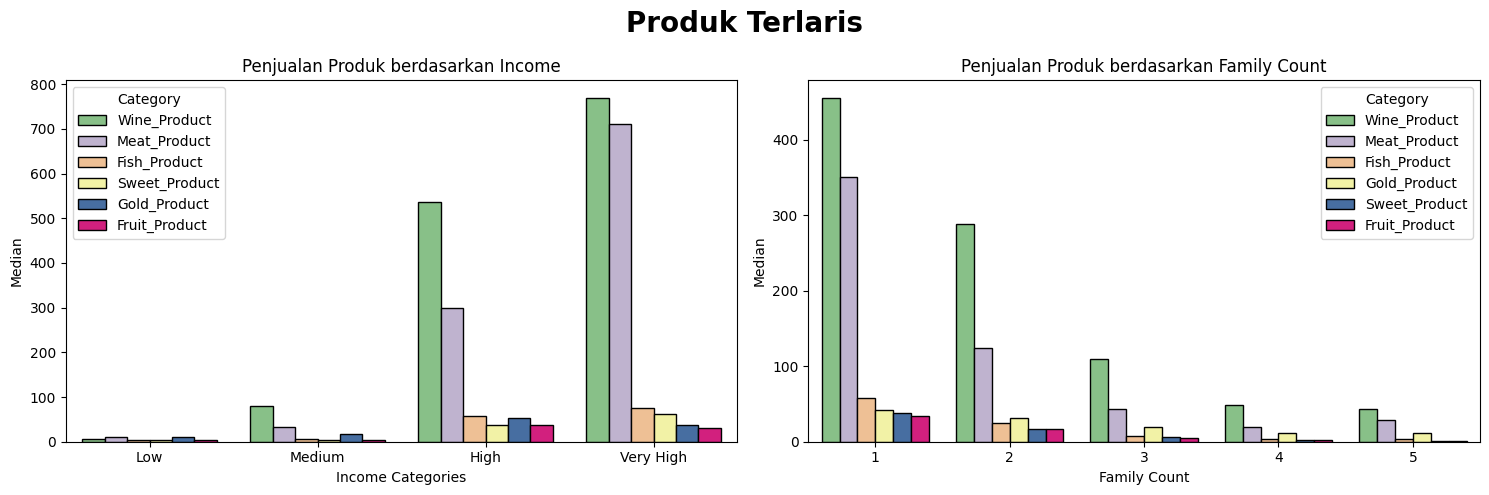

In [144]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Produk Terlaris', size=20, fontweight='bold')

# Barplot pertama dengan palet warna Accent
sns.barplot(data=melt_produk1, x='Income_Categories', y='Value', hue='Category', 
            estimator='median', edgecolor='k', palette='Accent', ax=axes[0])
axes[0].set_title('Penjualan Produk berdasarkan Income')
axes[0].set_xlabel('Income Categories')
axes[0].set_ylabel('Median')

# Barplot kedua dengan palet warna Accent
sns.barplot(data=melt_produk2, x='Family_Count', y='Value', hue='Category', 
            estimator='median', edgecolor='k', palette='Accent', ax=axes[1])
axes[1].set_title('Penjualan Produk berdasarkan Family Count')
axes[1].set_xlabel('Family Count')
axes[1].set_ylabel('Median')

# Menampilkan plot
plt.tight_layout()
plt.show()

> Interpretasi:

1. Pie Chart
    - Wine adalah produk terlaris, yang merupakan bagian terbesar dari total penjualan, diikuti oleh penjualan Meat.
    - Di sisi lain, Gold, Sweet, dan Fruit diidentifikasi sebagai produk dengan penjualan terendah.

2. Hubungan Penjualan Produk dengan Pendapatan dan Ukuran Keluarga
    - Visualisasi penjualan produk terhadap pendapatan menunjukkan adanya tren yang jelas, yaitu semakin tinggi pendapatan pelanggan, semakin banyak pula jumlah produk yang dibeli.
    - Korelasi positif ini menunjukkan bahwa pelanggan dengan tingkat pendapatan yang lebih tinggi cenderung membeli berbagai macam produk dari supermarket.
    - Di sisi lain, hubungan antara ukuran keluarga dan penjualan produk menunjukkan pola yang berbeda. Terlihat bahwa keluarga yang lebih besar cenderung membeli lebih sedikit produk.
    - Temuan ini bertentangan dengan anggapan bahwa keluarga yang lebih besar akan melakukan lebih banyak pembelian karena kebutuhan konsumsi yang lebih tinggi.
    - Namun, penting untuk dicatat bahwa mungkin ada berbagai faktor yang mempengaruhi tren ini, seperti kendala anggaran, kebiasaan konsumsi, atau preferensi berbelanja.

In [147]:
# Grouping for Product sold by Income Categories
var1 = sc_analysis[['Income_Categories', 'Store_Purchase', 'Web_Purchase', 'Catalog_Purchase']]
group_var1 = var1.groupby('Income_Categories').median()
group_var1.reset_index(inplace=True)

melt_var1 = pd.melt(group_var1, id_vars='Income_Categories', var_name='Categories', value_name='Value') #type: ignore
melt_var1.sort_values('Categories', ascending=False, inplace=True)

# Grouping for Product Sold by Family Size
var2 = sc_analysis[['Family_Count', 'Store_Purchase', 'Web_Purchase', 'Catalog_Purchase']]
group_var2 = var2.groupby('Family_Count').median()
group_var2.reset_index(inplace=True)

melt_var2 = pd.melt(group_var2, id_vars='Family_Count', var_name='Categories', value_name='Value') #type: ignore
melt_var2.sort_values('Categories', ascending=False, inplace=True)

# Grouping for Product sold by Education
var3 = sc_analysis[['Education', 'Store_Purchase', 'Web_Purchase', 'Catalog_Purchase']]
group_var3 = var3.groupby('Education').median()
group_var3.reset_index(inplace=True)

melt_var3 = pd.melt(group_var3, id_vars='Education', var_name='Categories', value_name='Value') #type: ignore
melt_var3.sort_values('Categories', ascending=False, inplace=True)

# Grouping for Product Sold by Age Group
var4 = sc_analysis[['Age_Group', 'Store_Purchase', 'Web_Purchase', 'Catalog_Purchase']]
group_var4 = var4.groupby('Age_Group').median()
group_var4.reset_index(inplace=True)

melt_var4 = pd.melt(group_var4, id_vars='Age_Group', var_name='Categories', value_name='Value') #type: ignore
melt_var4.sort_values('Categories', ascending=False, inplace=True)

C:\Users\Aimar Butragueno\AppData\Local\Temp\ipykernel_18568\3972207446.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_var1 = var1.groupby('Income_Categories').median()


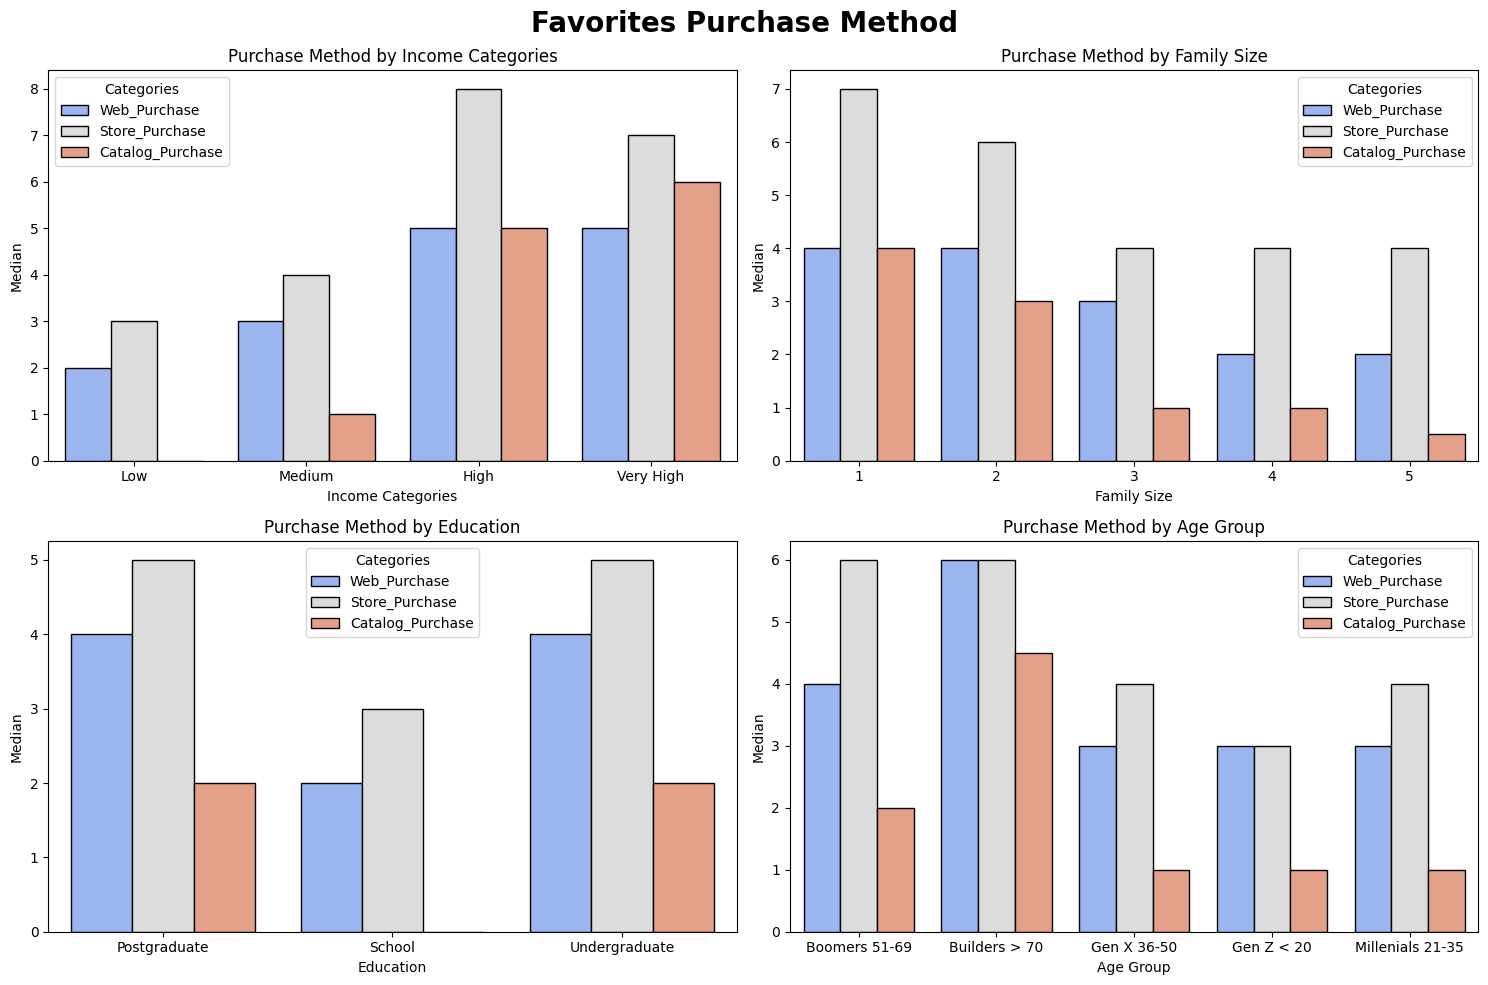

In [154]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Favorites Purchase Method', size=20, fontweight='bold')

# Income_Categories plot dengan palet coolwarm
sns.barplot(data=melt_var1, x='Income_Categories', y='Value', hue='Categories', 
            estimator='median', edgecolor='k', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Purchase Method by Income Categories')
axes[0, 0].set_xlabel('Income Categories')
axes[0, 0].set_ylabel('Median')

# Family_Count plot dengan palet coolwarm
sns.barplot(data=melt_var2, x='Family_Count', y='Value', hue='Categories', 
            estimator='median', edgecolor='k', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Purchase Method by Family Size')
axes[0, 1].set_xlabel('Family Size')
axes[0, 1].set_ylabel('Median')

# Education plot dengan palet coolwarm
sns.barplot(data=melt_var3, x='Education', y='Value', hue='Categories', 
            estimator='median', edgecolor='k', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Purchase Method by Education')
axes[1, 0].set_xlabel('Education')
axes[1, 0].set_ylabel('Median')

# Age_Group plot dengan palet coolwarm
sns.barplot(data=melt_var4, x='Age_Group', y='Value', hue='Categories', 
            estimator='median', edgecolor='k', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Purchase Method by Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Median')

# Mengatur tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

> Interpretasi

1. Metode Pembelian Berdasarkan Kategori Pendapatan
    - Pendapatan Rendah:
        - Metode pembelian yang dominan adalah Web Purchase.
    
    - Pendapatan Menengah:
        - Store Purchase mulai lebih dominan, dengan Web Purchase masih cukup tinggi.

    - Pendapatan Tinggi dan Sangat Tinggi:
        - Store Purchase tetap paling dominan, namun ada peningkatan pada Catalog Purchase.
        - Hal ini menunjukkan bahwa konsumen dengan pendapatan tinggi cenderung lebih memilih metode pembelian langsung di toko dan melalui katalog.

2. Metode Pembelian Berdasarkan Ukuran Keluarga
    - Keluarga Kecil (1-2 anggota):
        - Store Purchase mendominasi, dengan Web Purchase berada di urutan kedua.

    - Keluarga Lebih Besar (3-5 anggota):
        - Terjadi penurunan Store Purchase, tetapi tetap lebih tinggi dibandingkan metode lain.
        - Web Purchase menjadi lebih signifikan, sedangkan Catalog Purchase cenderung lebih rendah.

    - Hal ini menunjukkan bahwa keluarga besar mungkin lebih memilih belanja online atau metode lain yang lebih praktis.

3. Metode Pembelian Berdasarkan Tingkat Pendidikan
    - Postgraduate:
        - Dominasi pada Web Purchase, disusul oleh Store Purchase.

    - Undergraduate dan Sekolah Menengah:
        - Store Purchase lebih dominan, sedangkan Catalog Purchase juga cukup signifikan.

    - Hal ini menunjukkan bahwa konsumen dengan tingkat pendidikan lebih tinggi cenderung menggunakan Web Purchase, mungkin karena lebih terbiasa dengan teknologi.

4. Metode Pembelian Berdasarkan Kelompok Usia
    - Boomers (51-69) dan Builders (>70):
        - Lebih memilih Store Purchase, tetapi Web Purchase juga cukup tinggi.

    - Generasi X (36-50) dan Milenial (21-35):
        - Lebih memilih Web Purchase dibandingkan Store Purchase.

    - Gen Z (<20):
        - Lebih cenderung menggunakan Web Purchase, dengan Catalog Purchase sangat rendah.

    - Ini menunjukkan perbedaan pola belanja berdasarkan usia, di mana generasi lebih muda lebih memilih pembelian secara online.

**`Hubungan antara Income, Total Pengeluaran dengan Parent, dan Penerimaan Campaign`**

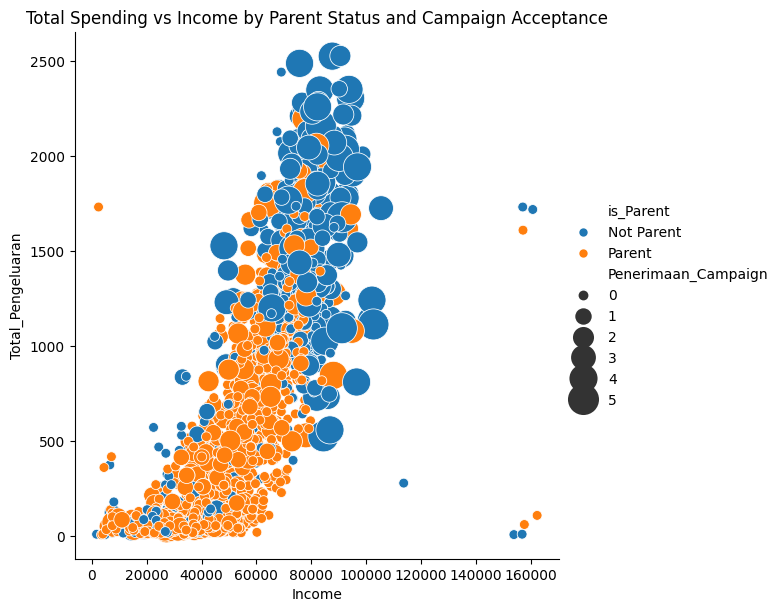

In [163]:
plot = sns.relplot(x="Income", y="Total_Pengeluaran", hue="is_Parent", size="Penerimaan_Campaign",
                   sizes=(50, 500), alpha=1,
                   height=6, aspect=1, data=sc_analysis)
plt.title('Total Spending vs Income by Parent Status and Campaign Acceptance');

> Interpretasi

1. Hubungan Income dan Pengeluaran:
    - Terlihat adanya korelasi positif antara pendapatan (Income) dan pengeluaran total (Total Pengeluaran), artinya semakin tinggi pendapatan, cenderung semakin tinggi pula pengeluarannya.

2. Perbedaan Berdasarkan Status Orang Tua:
    - Titik data yang berwarna biru mewakili individu yang bukan orang tua (Not Parent), sedangkan titik berwarna oranye mewakili orang tua (Parent).
    - Kedua kelompok (Parent dan Not Parent) tampaknya memiliki distribusi pengeluaran yang hampir sama pada tingkat pendapatan yang serupa, tetapi ada indikasi bahwa orang tua cenderung berada pada rentang pendapatan yang lebih rendah.

3. Penerimaan Campaign:
    - Ukuran gelembung menunjukkan jumlah kampanye yang diterima (Penerimaan_Campaign). Semakin besar ukuran gelembung, semakin banyak kampanye yang diterima.
    - Tidak terlihat pola yang jelas antara jumlah penerimaan kampanye dengan status orang tua maupun tingkat pengeluaran. Namun, sebagian besar kampanye diterima oleh mereka dengan tingkat pengeluaran menengah hingga tinggi.

# 4. **Conclusion & Recommendation**

**`Conclusion`**

> Analisis dataset pelanggan supermarket memberikan wawasan penting mengenai perilaku pelanggan, preferensi pembelian, dan konsumsi produk. Segmentasi Pelanggan memungkinkan supermarket untuk menargetkan kampanye pemasaran dengan lebih efektif, seperti menawarkan produk premium kepada pelanggan berpendapatan tinggi. Pelanggan dengan income tinggi dan pendidikan lebih tinggi cenderung menghabiskan lebih banyak, terutama untuk produk premium. Supermarket bisa menyesuaikan harga dan produk sesuai segmen pelanggan, meningkatkan program loyalitas, dan memanfaatkan data untuk mempersonalisasi pemasaran serta mengurangi pemborosan anggaran iklan.

**`Recommendation`**

1. Peningkatan Pengalaman Pelanggan Berdasarkan Preferensi Produk 
    - Insight: Data yang mencakup pengeluaran untuk berbagai kategori produk (seperti wine, meat, sweet, dll.) memberikan wawasan tentang produk favorit dari berbagai kelompok pelanggan.
    - Rekomendasi: Supermarket bisa meningkatkan pengalaman belanja dengan menyediakan produk yang sesuai dengan preferensi pelanggan yang sudah terbukti. Misalnya, jika pelanggan dengan pendapatan tinggi sering membeli produk premium, supermarket dapat memperkenalkan produk baru dalam kategori tersebut atau memberikan penawaran eksklusif.

2. Penargetan Iklan Berdasarkan Demografi
    - Insight: Berdasarkan data status pernikahan dan jumlah anak, supermarket dapat melihat pola belanja yang berbeda antar keluarga, pasangan, dan individu.
    - Rekomendasi: Supermarket dapat merancang iklan yang lebih spesifik, seperti penawaran untuk keluarga muda atau produk untuk orang tua. Misalnya, penawaran diskon untuk produk makanan anak atau kebutuhan keluarga dapat lebih efektif untuk segmen pelanggan dengan anak-anak di rumah.

3. Optimalisasi Program Loyalitas dan Hadiah
    - Insight: Dengan menganalisis kolom yang berkaitan dengan respons terhadap kampanye pemasaran dan keluhan pelanggan, supermarket dapat mengidentifikasi pelanggan yang lebih cenderung bereaksi positif terhadap insentif dan program loyalitas.
    - Rekomendasi: Program loyalitas dapat dioptimalkan dengan memberikan penghargaan yang lebih besar bagi pelanggan yang sering membeli produk tertentu atau yang berpendapatan tinggi. Selain itu, pelanggan yang sering mengajukan keluhan bisa menjadi target untuk menawarkan pengalaman yang lebih baik atau mendapatkan feedback lebih lanjut untuk meningkatkan kepuasan mereka.

4. Pemahaman tentang Perilaku Pembelian Online vs. Offline
    - Insight: Dengan adanya data tentang jumlah pembelian melalui berbagai saluran (web, katalog, toko fisik), supermarket dapat memahami apakah pelanggan lebih memilih berbelanja online atau langsung ke toko.
    - Rekomendasi: Jika data menunjukkan kecenderungan berbelanja online pada segmen tertentu, supermarket bisa memperkuat kehadirannya di platform digital dengan menawarkan lebih banyak promo eksklusif atau meningkatkan pengalaman belanja online agar lebih mudah bagi pelanggan.

5. Penyesuaian Harga Berdasarkan Segmen Pelanggan
    - Insight: Data mengenai pendapatan pelanggan dapat menunjukkan bahwa kelompok dengan pendapatan lebih tinggi cenderung lebih fleksibel dalam hal harga.
    - Rekomendasi: Supermarket bisa menerapkan strategi harga yang dinamis, di mana harga produk premium disesuaikan untuk pelanggan dengan pendapatan lebih tinggi. Sebaliknya, untuk segmen berpendapatan lebih rendah, supermarket dapat menawarkan diskon atau program pembayaran yang lebih terjangkau.

6. Peningkatan Keterlibatan Pelanggan Melalui Pemasaran yang Lebih Personalisasi
    - Insight: Penggunaan data demografis yang lebih mendalam membantu memahami preferensi dan kebiasaan pelanggan, yang memungkinkan pemasaran lebih terarah.
    - Rekomendasi: Supermarket bisa memanfaatkan alat pemasaran otomatis untuk mengirimkan penawaran yang disesuaikan berdasarkan riwayat pembelian dan data demografis pelanggan, seperti memberi diskon khusus untuk produk yang sering dibeli pelanggan atau mengingatkan pelanggan tentang produk yang mereka lihat sebelumnya.

7. Analisis Perilaku Pelanggan untuk Mengurangi Pemborosan
    - Insight: Dengan mengetahui segmen pelanggan mana yang paling sering membeli produk tertentu, supermarket bisa mengurangi pengeluaran iklan yang kurang efisien.
    - Rekomendasi: Supermarket bisa mengurangi biaya iklan untuk segmen pelanggan yang tidak relevan dengan produk tertentu dan mengarahkan anggaran pemasaran ke segmen yang lebih mungkin membeli produk tersebut, sehingga memaksimalkan pengembalian investasi iklan.